In [2]:
%load_ext autoreload
%autoreload 2

import os, json
import numpy as np
import matplotlib.pyplot as plt
import math
import sys
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.gridspec as gridspec
import scipy.io as spio
from scipy import stats
import pandas as pd
import pickle
import copy

import local_env
import scripts.ccf_analysis_utils
import scripts.functions as func
import scripts.plot_style as style
import scripts.plotting_utils as plt_utils
from scipy.ndimage import median_filter

## Final plots

In [3]:
main_figfolder = '../figs/manuscript_drafts/'
supplementary_figfolder = '../figs/supplementary_figs/'
os.makedirs(main_figfolder, exist_ok=True)
os.makedirs(supplementary_figfolder, exist_ok=True)

In [4]:
fig3 = plt_utils.Figure3()
fig3.load_data()

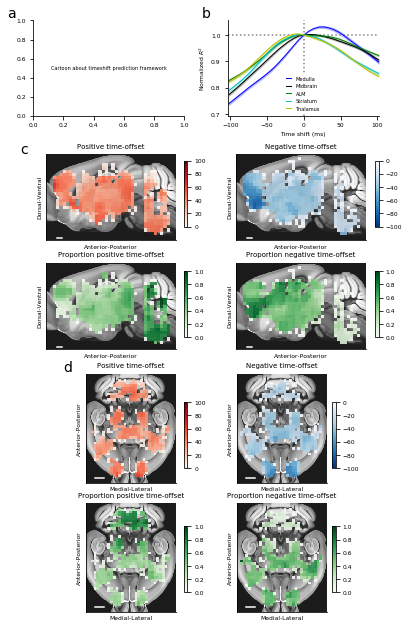

In [4]:
fig3.plot_fig3_main()
#plt.savefig(main_figfolder + 'figure3_draft.pdf', bbox_inches='tight')

Spearman correlation: 0.098, p = 0.00139, n=1059


(0.09813365820981772, 0.0013865236763194579)

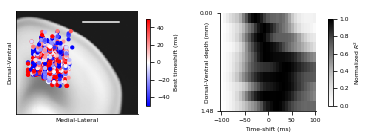

In [5]:
fig3.plot_alm_depth_supplementary()
#plt.savefig(supplementary_figfolder + 'figure3_alm_depth_supplementary.pdf', bbox_inches='tight')
fig3.get_alm_depth_stats()

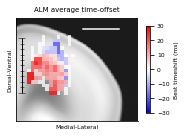

In [6]:
fig = plt.figure(figsize = (6,2))
ax1 = fig.add_subplot(121)
fig3.plot_alm_best_timeshift_heatmap(fig, ax1, filter_size = 3)

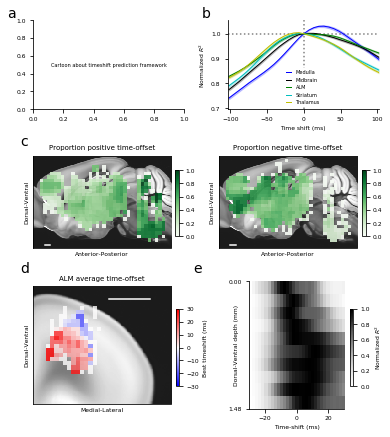

In [5]:
fig3.plot_fig3_main_v2()
plt.savefig(main_figfolder + 'figure3_draft_v2.png',dpi = 300, bbox_inches='tight')

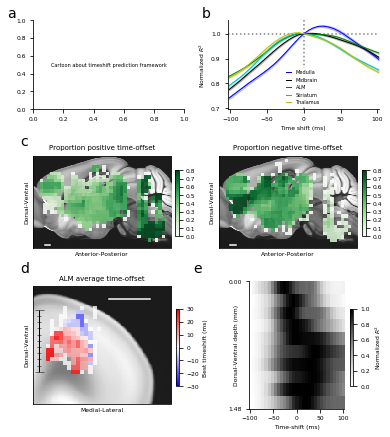

In [14]:
fig3.view_to_vlim['positive fraction'] = [0, 0.8]
fig3.view_to_vlim['negative fraction'] = [0, 0.8]
fig3.plot_fig3_main_v2()
plt.savefig(main_figfolder + 'figure3_draft_v4.pdf',dpi = 300, bbox_inches='tight')

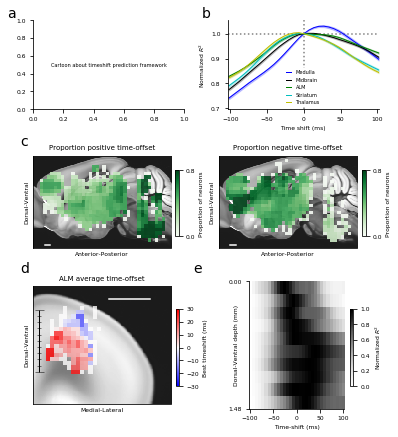

In [7]:
fig3.view_to_vlim['positive fraction'] = [0, 0.8]
fig3.view_to_vlim['negative fraction'] = [0, 0.8]
fig3.plot_fig3_main_v5()
plt.savefig(main_figfolder + 'figure3_draft_v5.pdf',dpi = 300, bbox_inches='tight')

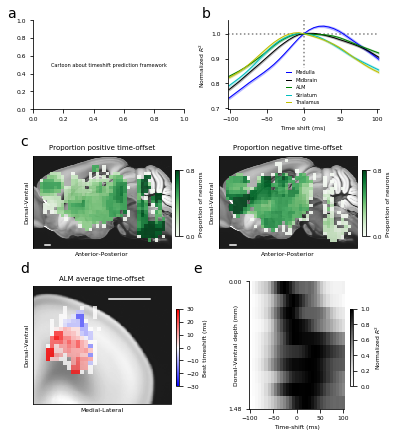

In [97]:
fig3.view_to_vlim['positive fraction'] = [0, 0.8]
fig3.view_to_vlim['negative fraction'] = [0, 0.8]
fig3.plot_fig3_main_v6()
plt.savefig(main_figfolder + 'figure3_draft_v6.pdf',dpi = 300, bbox_inches='tight')

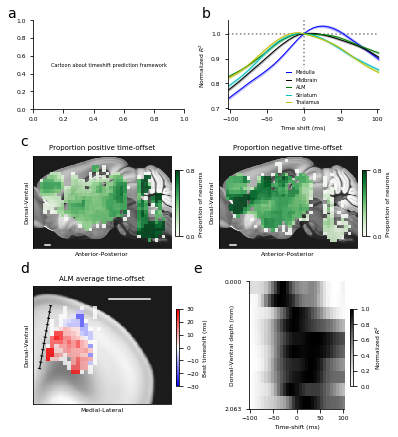

In [5]:
fig3.view_to_vlim['positive fraction'] = [0, 0.8]
fig3.view_to_vlim['negative fraction'] = [0, 0.8]
fig3.plot_fig3_main_v6(alm_depth_angle= 10)
plt.savefig(main_figfolder + 'figure3_draft_v7.pdf',dpi = 300, bbox_inches='tight')

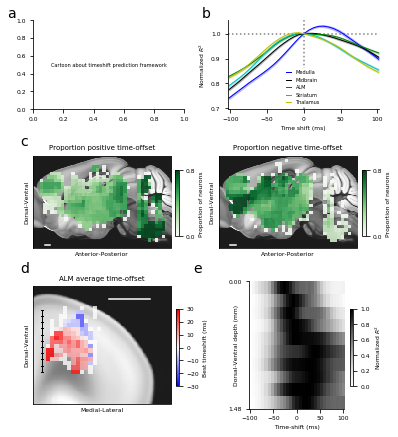

In [9]:
fig3.view_to_vlim['positive fraction'] = [0, 0.8]
fig3.view_to_vlim['negative fraction'] = [0, 0.8]
fig3.plot_fig3_main_v6(alm_depth_angle= 0)
plt.savefig(main_figfolder + 'figure3_draft_v8.pdf',dpi = 300, bbox_inches='tight')

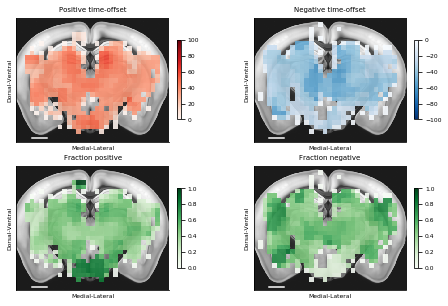

In [6]:
fig3.plot_coronal_heatmaps_supplementary()
#plt.savefig(supplementary_figfolder + 'figure3_coronal_heatmaps_supplementary.pdf', bbox_inches='tight')

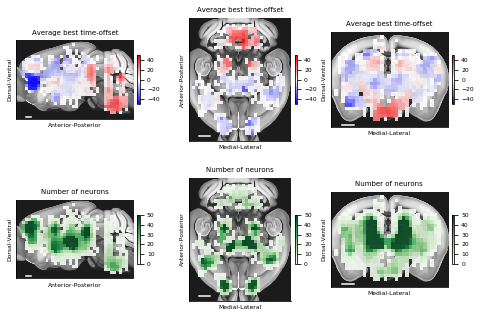

In [7]:
fig3.plot_three_views_average_and_count()
#plt.savefig(supplementary_figfolder + 'figure3_three_views_average_and_count.pdf', bbox_inches='tight')

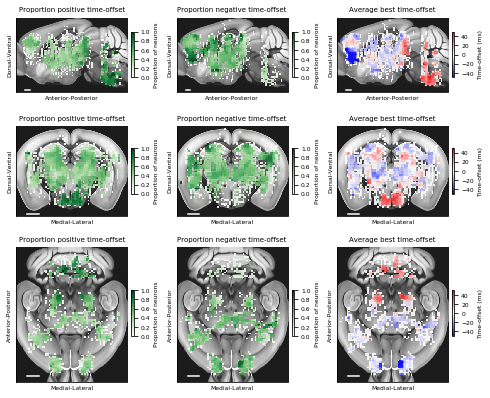

In [11]:
f, axs = plt.subplots(3,3, figsize = (7.8,9))
axs = axs.flatten()
f.subplots_adjust(hspace = 0.1, wspace=0.4)
voxel_size = 150

coronal_shift = 0.08

views = ['positive fraction', 'negative fraction', 'all average']
cbar_titles = ['Proportion of neurons', 'Proportion of neurons', 'Time-offset (ms)']
for i, view in enumerate(views):
    fig3.plot_saggital_heatmap(f, ax = axs[i], view = view, voxel_size= voxel_size, cbar_x0_shift = 0.005, cbar_title= cbar_titles[i])
    axs[i].set_xlabel('Anterior-Posterior')
    axs[i].set_ylabel('Dorsal-Ventral')

    fig3.plot_coronal_heatmap(f, ax = axs[i+3], view = view, voxel_size= voxel_size, cbar_y0_shift = coronal_shift,cbar_x0_shift = 0.005, cbar_title= cbar_titles[i])
    axs[i+3].set_xlabel('Medial-Lateral')
    axs[i+3].set_ylabel('Dorsal-Ventral')

    fig3.plot_horizontal_heatmap(f, ax = axs[i+6], view = view, voxel_size= voxel_size, cbar_y0_shift = 0.12,cbar_x0_shift = 0.005, cbar_title= cbar_titles[i])
    axs[i+6].set_xlabel('Medial-Lateral')
    axs[i+6].set_ylabel('Anterior-Posterior')
    
for ii in range(3,6):
    pos = axs[ii].get_position()
    axs[ii].set_position([pos.x0, pos.y0 + coronal_shift, pos.width, pos.height])

for ii in range(6,9):
    pos = axs[ii].get_position()
    axs[ii].set_position([pos.x0, pos.y0, pos.width, pos.height*2])

plt.savefig(supplementary_figfolder + 'timeshifts_all_views_heatmaps_voxel%d.pdf'%voxel_size, dpi = 300, bbox_inches='tight')

### Reviewer figures

In [4]:
reviewer_figfolder = '../figs/reviewer_figures/'

In [7]:
inds = fig3._get_restriction_inds()
best_times = fig3._get_best_times()[inds]

Wilcoxon signed-rank test: p = 1.16e-01


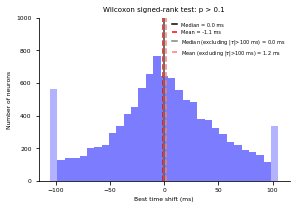

In [36]:
plt.figure(figsize = (4.5,3))

extreme_mask = np.abs(best_times) > 100
median = np.median(best_times)
mean = np.mean(best_times)
exlusion_median = np.median(best_times[~extreme_mask])
exlusion_mean = np.mean(best_times[~extreme_mask])
plt.hist(best_times[~extreme_mask], bins = np.linspace(-105.4,105.4,32), color = 'blue', alpha = 0.3)
plt.hist(best_times, bins = np.linspace(-105.4,105.4,32), color = 'blue', alpha = 0.3)

plt.axvline(median, color = 'k')
plt.axvline(mean, color = 'r', linestyle = '--')
plt.axvline(exlusion_median, color = 'gray')
plt.axvline(exlusion_mean, color = 'salmon', linestyle = '--')
plt.xlabel('Best time shift (ms)')
plt.ylabel('Number of neurons')
plt.legend(['Median = %.1f ms'%median, 'Mean = %.1f ms'%mean,
            r'Median (excluding |$\tau$|>100 ms) = %.1f ms'%exlusion_median,
            r'Mean (excluding |$\tau$|>100 ms) = %.1f ms'%exlusion_mean])
n_positive = np.sum(best_times > 0)
n_negative = np.sum(best_times < 0)
n_total = n_positive + n_negative
p_binom = stats.binom_test(n_positive, n_total, p= 0.5)

stat,p = stats.wilcoxon(best_times)
print('Wilcoxon signed-rank test: p = %.2e'%p)
pstring = 'p = %.2e'%p if p < 0.1 else 'p > 0.1'

plt.title('Wilcoxon signed-rank test: %s'%(pstring))
plt.ylim(0,1000)

plt.savefig(reviewer_figfolder + 'best_timeshift_histogram_allneurons.png',dpi = 300, bbox_inches='tight')



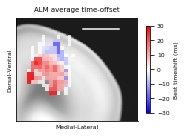

In [4]:
fig = plt.figure(figsize = (6,2))
ax1 = fig.add_subplot(121)
fig3.plot_region_best_timeshift_heatmap(fig, ax1, filter_size = 3, region = 'ALM')

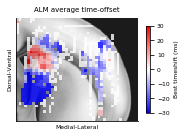

In [28]:
fig = plt.figure(figsize = (6,2))
ax1 = fig.add_subplot(121)
fig3.plot_region_best_timeshift_heatmap(fig, ax1, filter_size = 3, region = ['Isocortex','ALM'],
                                        ml_lims = [500,5000], dv_lims = [1200,5000], ap_cut = 270)

In [29]:
region_dictionary = {
    'ALM': 'ALM',
    'Somatosensory': 'Somatosensory areas',
    'Somatomotor w/o ALM': 'Somatomotor areas',
    'Orbital': 'Orbital area',
    'Somatomotor + ALM': ['Somatomotor areas','ALM'],
    'Isocortex': ['Isocortex', 'ALM'],
}

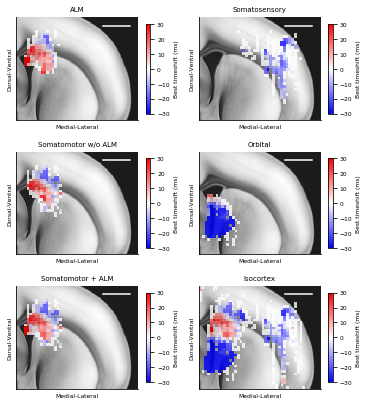

In [37]:
f,ax = plt.subplots(3,2, figsize = (6,7))
ax = ax.flatten()

for i, k,v in zip(range(6), region_dictionary.keys(), region_dictionary.values()):
    fig3.plot_region_best_timeshift_heatmap(f, ax[i], filter_size = 3, region = v,titlestr = k,
                                            ml_lims = [500,5000], dv_lims = [1200,5000], ap_cut = 270)
    
plt.savefig(supplementary_figfolder + 'best_timeshift_heatmaps_all_cortical_regions.png', bbox_inches='tight')


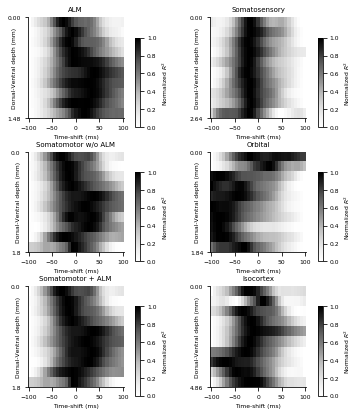

In [41]:
f,ax = plt.subplots(3,2, figsize = (6,7))
ax = ax.flatten()

for i, k,v in zip(range(6), region_dictionary.keys(), region_dictionary.values()):
    fig3.plot_region_depth_r2(f, ax[i], region = v)
    ax[i].set_title(k)

plt.savefig(supplementary_figfolder + 'depth_r2_all_cortical_regions.png', bbox_inches='tight')

In [9]:
ccf_labels, ccf_coords, alm_inds = fig3._get_misc_arrays()
alm_coords = ccf_coords[alm_inds] - fig3.global_offset_vec
alm_coords[:,0] = np.abs(alm_coords[:,0])

820 2020
1680 3260


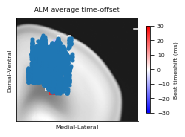

In [16]:

fig = plt.figure(figsize = (6,2))
ax1 = fig.add_subplot(121)
fig3.plot_region_best_timeshift_heatmap(fig, ax1, filter_size = 3, region = 'ALM')

ax1.plot(alm_coords[:,0],alm_coords[:,1],'.')

print(min(alm_coords[:,0]),max(alm_coords[:,0]))
print(min(alm_coords[:,1]),max(alm_coords[:,1]))

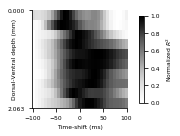

In [82]:
fig = plt.figure(figsize = (6,2))
ax1 = fig.add_subplot(121)
fig3.plot_region_depth_r2(fig, ax1, region = 'ALM', angle = 10)

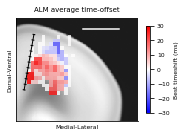

In [81]:
fig = plt.figure(figsize = (6,2))
ax1 = fig.add_subplot(121)
fig3.plot_region_best_timeshift_heatmap(fig, ax1, filter_size = 3, region = 'ALM', angle = 10,depth_line = True)


In [80]:
fig3.get_alm_depth_stats(angle = 10)

Spearman correlation: 0.063, p = 0.04146, n=1059


(0.06266591693113907, 0.041461250248320376)

Spearman correlation: 0.098, p = 0.00139, n=1059
Spearman correlation: 0.083, p = 0.00719, n=1059
Spearman correlation: 0.063, p = 0.04146, n=1059
Spearman correlation: 0.047, p = 0.12990, n=1059
Spearman correlation: 0.039, p = 0.20257, n=1059
Spearman correlation: 0.037, p = 0.23252, n=1059


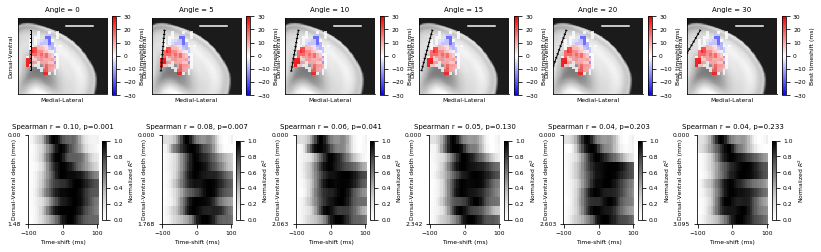

In [95]:
angles = [0,5,10,15,20,30]

fig,axs = plt.subplots(2,len(angles), figsize = (14,4))
axs = axs.flatten()


for i, angle in enumerate(angles):
    
    fig3.plot_region_best_timeshift_heatmap(fig, axs[i], filter_size = 3, region = 'ALM', angle = angle, depth_line = True)
    fig3.plot_region_depth_r2(fig, axs[i+len(angles)], region = 'ALM', angle = angle, cbar_y0_shift  = -0.02,cbar_x0_shift=-0.01)
    spear_r, p = fig3.get_alm_depth_stats(angle = angle)
    axs[i].set_title('Angle = %d'%angle)
    axs[i+len(angles)].set_title('Spearman r = %.2f, p=%.3f'%(spear_r,p))

plt.savefig(supplementary_figfolder + 'best_timeshift_heatmaps_depth_r2_ALM_angles.png', bbox_inches='tight',dpi = 300)


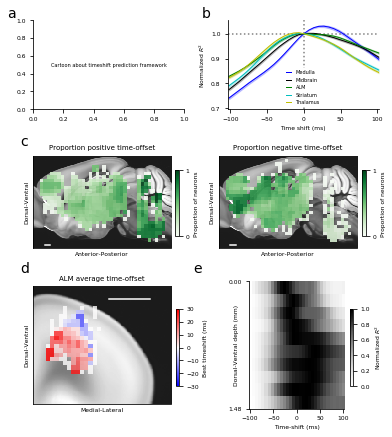

In [96]:
fig3.plot_fig3_main_v6()

In [26]:
type(['a','b']) == list

True

# Drafts

#### Fig 3

In [42]:
def get_2D_grid_averages_with_count(best_times, ccf_coords, voxel_size = 300, projection_axis = 0):
    # Project ccf_coords onto the 2D plane
    coords_2d = np.delete(ccf_coords, projection_axis, axis=1)
    
    # Calculate the voxel indices for each point
    voxel_indices = np.floor(coords_2d / voxel_size).astype(int)
    
    # Find the bounds for the grid
    min_indices = np.min(voxel_indices, axis=0)
    max_indices = np.max(voxel_indices, axis=0)
    grid_shape = max_indices - min_indices + 1
    
    # Initialize a grid to store the sum and count of best_times for averaging
    sum_grid = np.zeros(grid_shape)
    count_grid = np.zeros(grid_shape)
    
    # Populate the grids with summed times and counts
    for index, time in zip(voxel_indices, best_times):
        normalized_index = tuple(index - min_indices)  # Normalize indices to start from 0,0
        sum_grid[normalized_index] += time
        count_grid[normalized_index] += 1
    
    # Calculate the average best time for each voxel
    with np.errstate(invalid='ignore'):  # Ignore divisions by 0
        avg_grid = np.divide(sum_grid, count_grid)
        avg_grid[np.isnan(avg_grid)] = 0  # Replace NaNs with 0
    
    return avg_grid, min_indices, max_indices, count_grid

def get_2D_count_fractions(best_times, ccf_coords, subset_inds, voxel_size = 300, projection_axis = 0):
    # Project ccf_coords onto the 2D plane
    _, min_inds_denom, max_inds_denom, count_grid_denom = get_2D_grid_averages_with_count(best_times, ccf_coords, voxel_size, projection_axis)
    _, min_inds_num, max_inds_num, count_grid_num = get_2D_grid_averages_with_count(best_times[subset_inds], ccf_coords[subset_inds], voxel_size, projection_axis)

    # Calculate the fraction of counts for each voxel
    with np.errstate(invalid='ignore'):  # Ignore divisions by 0
        fraction_grid = np.divide(count_grid_num, count_grid_denom[min_inds_num[0]-min_inds_denom[0]:,min_inds_num[1]-min_inds_denom[1]:])
        fraction_grid[np.isnan(fraction_grid)] = 0  # Replace NaNs with 0

    return fraction_grid, min_inds_num, max_inds_num

def plot_best_times_2d_heatmap(ax, best_times, ccf_coords, 
                               vlims = [0, 50], voxel_size = 300, projection_axis = 0, 
                               type = 'count', subset_inds = None, 
                               cmap = 'Greys', 
                               filter_size = 3,
                               alpha = 0.8,
                               xlims = None, ylims = None, 
                               xticks = [], yticks = [],
                               xtitle = None, ytitle = None,
                               title = None):
    avg_grid, min_inds, max_inds, count_grid = get_2D_grid_averages_with_count(best_times, ccf_coords, voxel_size, projection_axis)
    if type == 'count':
        data = count_grid
    elif type == 'average':
        data = avg_grid
    elif type == 'fraction':
        data, min_inds, max_inds = get_2D_count_fractions(best_times, ccf_coords, subset_inds, voxel_size, projection_axis)
    filtered_data = median_filter(data, size = filter_size)
    masked_data = np.ma.masked_where(data == 0, filtered_data)
    im = ax.imshow(masked_data.T, cmap = cmap, origin = 'lower', vmin = vlims[0], vmax = vlims[1], aspect='equal', extent=[min_inds[0]*voxel_size, (max_inds[0]+1)*voxel_size, min_inds[1]*voxel_size, (max_inds[1]+1)*voxel_size], alpha = alpha)
    if xlims is not None:
        ax.set_xlim(xlims)
    if ylims is not None:
        ax.set_ylim(ylims)
    if xticks is not None:
        ax.set_xticks(xticks)
    if yticks is not None:
        ax.set_yticks(yticks)
    if xtitle is not None:
        ax.set_xlabel(xtitle)
    if ytitle is not None:
        ax.set_ylabel(ytitle)

    if title is not None:
        ax.set_title(title)
    return im

In [26]:

r2_new = pickle.load(open('../data/final/r2_embed_cv_timeshift.pkl', 'rb'))
timeshifts = np.arange(-30,32,2, dtype = int)
method_to_string = {'old': '_old', 'old_clipped': '_old', 'new': ''}

epoch = 'response'
r2_method = 'new'

r2 = []
fr = r2_new['5_0']['avg_fr'].copy()
ccf_coords = r2_new['5_0']['ccf_coords'].copy()

for timesh in timeshifts:
    r2.append(r2_new['5_%d'%timesh]['%s_r2%s'%(epoch,method_to_string[r2_method])].copy())

r2 = np.array(r2)
best_times = 3.4 * timeshifts[r2.argmax(axis = 0)]

delta_r2 = 1.20
fr_threshold = 2.
r2_threshold = 0.01

voxel_size = 300



delta_inds = np.where((r2.max(axis = 0) / r2.mean(axis = 0)) > delta_r2)[0]
fr_inds = np.where(fr > fr_threshold)[0]
threshold_inds = np.where(r2[np.where(timeshifts == 0)[0][0],:] > r2_threshold)[0]
threshold_inds = np.intersect1d(threshold_inds, fr_inds)
restriction_inds = np.intersect1d(threshold_inds, delta_inds)

restricted_best_times = best_times[restriction_inds]
restricted_ccf_coords = ccf_coords[restriction_inds]
pos_inds = np.where(restricted_best_times > 0)[0]
neg_inds = np.where(restricted_best_times < 0)[0]

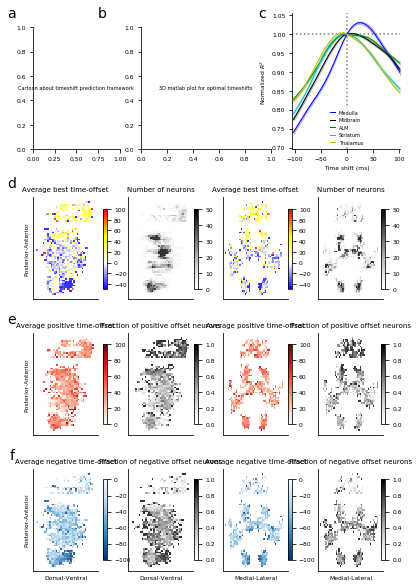

<Figure size 432x679.68 with 0 Axes>

In [27]:
plt.rcParams['figure.figsize'][1] = style.fig_w_max * 12 / 9

fig = plt.figure()
gs = gridspec.GridSpec(12, 12, figure=fig)  # 14 rows and 12 columns

# Top row, three subplots 6x6
ax1 = fig.add_subplot(gs[0:3, 0:4])  # First subplot, 3 rows x 3 columns
ax2 = fig.add_subplot(gs[0:3, 4:8])  # Second subplot, 3 rows x 3 columns
ax3 = fig.add_subplot(gs[0:3, 8:12])  # Third subplot, 3 rows x 2 columns



grid_axes = []
for i in range(4):
    grid_axes.append([])
    for j in range(3):
        ax = fig.add_subplot(gs[(3 + 3*j):(6 + 3*j), (3 * i): (3 + 3 * i)])
#        #ax.set_position([0.01 + 0.18 * i, 0.5 - 0.2 * j, 0.13, 0.13])
        grid_axes[i].append(copy.copy(ax))


ax1.set_position([0.1, 0.72, 0.20, 0.18])  # [left, bottom, width, height]
ax2.set_position([0.35, 0.72, 0.3, 0.18])
ax3.set_position([0.70, 0.72, 0.25, 0.20])

#for i in range(4):
#    for j in range(3):
#        grid_axes[j][i].set_position([0.1 + 0.18 * i, 0.5 - 0.2 * j, 0.10, 0.10])

#fig.subplots_adjust(hspace=0.3)
#ax4.set_position([0.4, 0.1, 0.35, 0.35])
#ax5.set_position([0.8, 0.1, 0.15, 0.35])

f3 = plt_utils.Figure3()
f3.load_data()

f3.print_text(ax1,'Cartoon about timeshift prediction framework')
f3.print_text(ax2,'3D matlab plot for optimal timeshifts')
f3.plot_timeshift_curves(ax3, r2_method_string= '')

xlims = [[0,8000],[900,10800]]
ylims = [1500,13500]
voxel_size = 200
filter_size = 1

for i_proj,proj_ax in enumerate([0,1]):

    im = plot_best_times_2d_heatmap(grid_axes[0 + 2*i_proj][0], restricted_best_times, restricted_ccf_coords, vlims = [-50, 100], filter_size= filter_size, voxel_size= voxel_size, projection_axis = proj_ax, type = 'average', cmap = style.custom_cmap, xlims = xlims[i_proj], ylims = ylims, title = 'Average best time-offset')
    cbar = fig.colorbar(im, ax = grid_axes[0 + 2*i_proj][0], fraction = 0.05, pad = 0.01)
    cbar.ax.set_position([cbar.ax.get_position().x0 - 0.04 + 0.035*i_proj,  # Move left
                      cbar.ax.get_position().y0 - 0.025,  # Move down
                      cbar.ax.get_position().width, 
                      cbar.ax.get_position().height])
    
    im = plot_best_times_2d_heatmap(grid_axes[1 + 2*i_proj][0], restricted_best_times, restricted_ccf_coords, vlims = [0, 50], filter_size= filter_size, voxel_size= voxel_size, projection_axis = proj_ax, type = 'count', cmap = 'Greys', xlims = xlims[i_proj], ylims = ylims, title = 'Number of neurons')
    cbar = fig.colorbar(im, ax = grid_axes[1 + 2*i_proj][0], fraction = 0.05, pad = 0.01)
    cbar.ax.set_position([cbar.ax.get_position().x0 - 0.025 + 0.04*i_proj,  # Move left
                      cbar.ax.get_position().y0 - 0.025,  # Move down
                      cbar.ax.get_position().width, 
                      cbar.ax.get_position().height])

    im = plot_best_times_2d_heatmap(grid_axes[0 + 2*i_proj][1], restricted_best_times[pos_inds], restricted_ccf_coords[pos_inds], vlims = [0, 100], filter_size= filter_size, voxel_size= voxel_size, projection_axis = proj_ax, type = 'average', cmap = 'Reds', xlims = xlims[i_proj], ylims = ylims, title = 'Average positive time-offset')
    cbar = fig.colorbar(im, ax = grid_axes[0 + 2*i_proj][1], fraction = 0.05, pad = 0.01)
    cbar.ax.set_position([cbar.ax.get_position().x0 - 0.04 + 0.035*i_proj,  # Move left
                      cbar.ax.get_position().y0 - 0.032,  # Move down
                      cbar.ax.get_position().width, 
                      cbar.ax.get_position().height])
    im = plot_best_times_2d_heatmap(grid_axes[1 + 2*i_proj][1], restricted_best_times, restricted_ccf_coords, vlims = [0, 1], filter_size= filter_size, voxel_size= voxel_size ,projection_axis = proj_ax, type = 'fraction', cmap = 'Greys', subset_inds= pos_inds, xlims = xlims[i_proj], ylims = ylims, title = 'Fraction of positive offset neurons')
    cbar = fig.colorbar(im, ax = grid_axes[1 + 2*i_proj][1],  fraction = 0.05, pad = 0.01)
    cbar.ax.set_position([cbar.ax.get_position().x0 - 0.025 + 0.04*i_proj,  # Move left
                      cbar.ax.get_position().y0 - 0.032,  # Move down
                      cbar.ax.get_position().width, 
                      cbar.ax.get_position().height])

    im = plot_best_times_2d_heatmap(grid_axes[0 + 2*i_proj][2], restricted_best_times[neg_inds], restricted_ccf_coords[neg_inds], vlims = [-100, 0], filter_size= filter_size, voxel_size= voxel_size, projection_axis = proj_ax, type = 'average', cmap = 'Blues_r', xlims = xlims[i_proj], ylims = ylims, title = 'Average negative time-offset')
    cbar = fig.colorbar(im, ax = grid_axes[0 + 2*i_proj][2],  fraction = 0.05, pad = 0.01)
    cbar.ax.set_position([cbar.ax.get_position().x0 - 0.04 + 0.035*i_proj,  # Move left
                      cbar.ax.get_position().y0 - 0.04,  # Move down
                      cbar.ax.get_position().width, 
                      cbar.ax.get_position().height])
    im = plot_best_times_2d_heatmap(grid_axes[1 + 2*i_proj][2], restricted_best_times, restricted_ccf_coords, vlims = [0, 1], filter_size= filter_size, voxel_size= voxel_size, projection_axis = proj_ax, type = 'fraction', cmap = 'Greys', subset_inds= neg_inds, xlims = xlims[i_proj], ylims = ylims, title = 'Fraction of negative offset neurons')
    cbar = fig.colorbar(im, ax = grid_axes[1 + 2*i_proj][2], fraction = 0.05, pad = 0.01)
    cbar.ax.set_position([cbar.ax.get_position().x0 - 0.025 + 0.04*i_proj,  # Move left
                      cbar.ax.get_position().y0 - 0.04,  # Move down
                      cbar.ax.get_position().width, 
                      cbar.ax.get_position().height])

for ii in range(2):
        grid_axes[ii][2].set_xlabel('Dorsal-Ventral')
        grid_axes[ii+2][2].set_xlabel('Medial-Lateral')

for ii in range(3):
    grid_axes[0][ii].set_ylabel('Posterior-Anterior')

for i in range(4):
    for j in range(3):
        grid_axes[i][j].set_position([0.1 + 0.22 * i, 0.5 - 0.2 * j, 0.15, 0.15])

fig.text(0.05, 0.92, 'a', ha='center', va='center', fontsize=14)
fig.text(0.26, 0.92, 'b', ha='center', va='center', fontsize=14)
fig.text(0.63, 0.92, 'c', ha='center', va='center', fontsize=14)
fig.text(0.05, 0.67, 'd', ha='center', va='center', fontsize=14)
fig.text(0.05, 0.47, 'e', ha='center', va='center', fontsize=14)
fig.text(0.05, 0.27, 'f', ha='center', va='center', fontsize=14)

#plt.savefig(figfolder + 'figure3_draft.png', dpi=300)
plt.show()
plt.clf()


## Individual panels

In [14]:
tif_name = 'AllenRefVolCoronal_10_ds222.tif'
from PIL import Image

res_image = 20 # image resolution
im = Image.open('../data/%s'%tif_name)
h, w = np.shape(im)
n_frames = im.n_frames
im_array = np.zeros((h,w,n_frames)) # (400, 570, 660), (DV, ML, AP)
for i in range(im.n_frames):
    im.seek(i)
    im_array[:,:,i] = np.array(im)
print('Anatomy data loaded.')

Anatomy data loaded.


In [29]:
image_plot_DV_start = 100
image_plot_DV_length = 200
image_plot_ML_mid = 285
image_plot_ML_half_length = 150
image_plot_AP_group1 = 340
image_plot_AP_group2 = 320

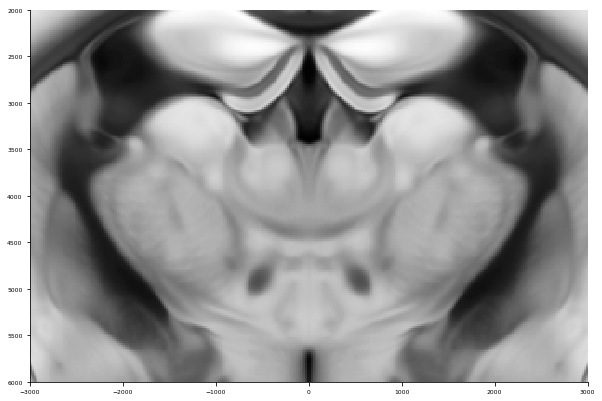

In [30]:
fig, ax = plt.subplots(1,1, figsize = (10,10))

ax.imshow(im_array[image_plot_DV_start:(image_plot_DV_start + image_plot_DV_length),(image_plot_ML_mid-image_plot_ML_half_length):(image_plot_ML_mid+image_plot_ML_half_length),image_plot_AP_group2],extent = [-3000,3000,6000,2000], cmap = 'Greys_r', aspect='equal')

In [31]:
proj_ax = 0
i_proj = 0
xlims = [[0,8000],[900,10800]]
ylims = [1500,13500]

Text(0,0.5,'Posterior-Anterior')

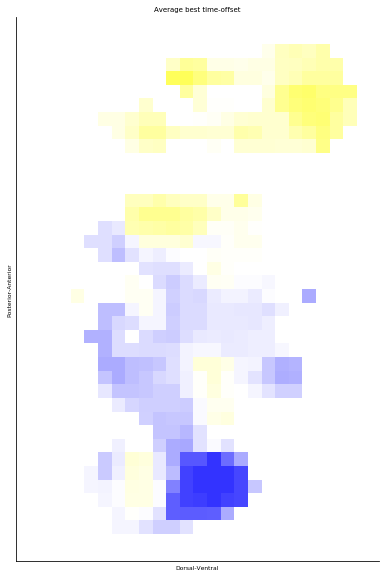

In [32]:
fig, ax = plt.subplots(1,1, figsize = (10,10))
im = plot_best_times_2d_heatmap(ax, restricted_best_times, restricted_ccf_coords, vlims = [-50, 100], projection_axis = proj_ax, type = 'average', cmap = style.custom_cmap, xlims = xlims[i_proj], ylims = ylims, title = 'Average best time-offset')
plt.xlabel('Dorsal-Ventral')
plt.ylabel('Posterior-Anterior')

In [9]:
from scipy.ndimage import median_filter

In [10]:
def plot_best_times_2d_heatmap_transpose(ax, best_times, ccf_coords, 
                               vlims = [0, 50], voxel_size = 300, projection_axis = 0, 
                               type = 'count', subset_inds = None, 
                               cmap = 'Greys', 
                               filter_size = 3,
                               alpha = 0.8,
                               xlims = None, ylims = None, 
                               xticks = [], yticks = [],
                               xtitle = None, ytitle = None,
                               title = None):
    avg_grid, min_inds, max_inds, count_grid = get_2D_grid_averages_with_count(best_times, ccf_coords, voxel_size, projection_axis)
    if type == 'count':
        data = count_grid
    elif type == 'average':
        data = avg_grid
    elif type == 'fraction':
        data, min_inds, max_inds = get_2D_count_fractions(best_times, ccf_coords, subset_inds, voxel_size, projection_axis)
    filtered_data = median_filter(data, size = filter_size)
    masked_data = np.ma.masked_where(filtered_data == 0, filtered_data)
    im = ax.imshow(masked_data, cmap = cmap, vmin = vlims[0], vmax = vlims[1],aspect='equal', extent=[min_inds[1]*voxel_size, (max_inds[1]+1)*voxel_size, (max_inds[0]+1)*voxel_size, min_inds[0]*voxel_size], alpha = alpha)
    if xlims is not None:
        ax.set_xlim(xlims)
    if ylims is not None:
        ax.set_ylim(ylims)
    if xticks is not None:
        ax.set_xticks(xticks)
    if yticks is not None:
        ax.set_yticks(yticks)
    if xtitle is not None:
        ax.set_xlabel(xtitle)
    if ytitle is not None:
        ax.set_ylabel(ytitle)

    if title is not None:
        ax.set_title(title)
    return im

In [35]:
proj_ax = 0
i_proj = 0
DV_start = int(xlims[i_proj][0] / res_image)
DV_end = int(xlims[i_proj][1] / res_image)
AP_start = int(ylims[0] / res_image)
AP_end = int(ylims[1] / res_image)
ML_line = 250

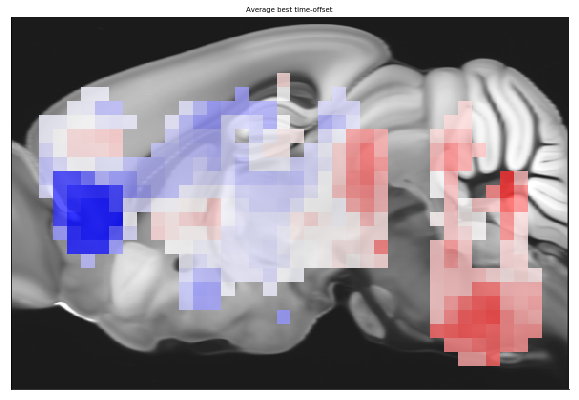

In [36]:
fig, ax = plt.subplots(1,1, figsize = (10,10))

ax.imshow(im_array[DV_start:DV_end,ML_line,AP_start:AP_end],extent = [ylims[0],ylims[1],xlims[i_proj][1],xlims[i_proj][0]], cmap = 'Greys_r', aspect='equal', alpha = 0.9)
im = plot_best_times_2d_heatmap_transpose(ax, restricted_best_times, restricted_ccf_coords, vlims = [-50, 50], projection_axis = proj_ax, type = 'average', cmap = 'bwr', xlims = ylims, ylims = [xlims[i_proj][1],xlims[i_proj][0]], title = 'Average best time-offset')

In [37]:
xlims = [[1500,13500], [900,10800]]
ylims = [[8000,0],[1500,13500]]

In [38]:
dv_slices = [slice(int(ylims[0][1] / res_image), int(ylims[0][0] / res_image)),
             210]
ml_slices = [250,
             slice(int(xlims[1][0] / res_image), int(xlims[1][1] / res_image))]
ap_slices = [slice(int(xlims[0][0] / res_image), int(xlims[0][1] / res_image)),
             slice(int(ylims[1][0] / res_image), int(ylims[1][1] / res_image))]

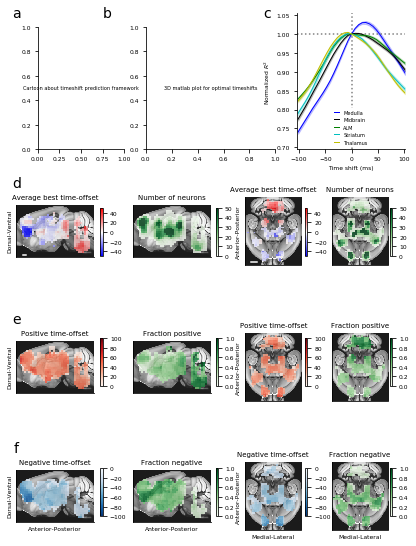

<Figure size 432x679.68 with 0 Axes>

In [39]:
plt.rcParams['figure.figsize'][1] = style.fig_w_max
plt.rcParams['figure.figsize'][1] = style.fig_w_max * 12 / 9

fig = plt.figure()
gs = gridspec.GridSpec(12, 12, figure=fig)  # 14 rows and 12 columns

# Top row, three subplots 6x6
ax1 = fig.add_subplot(gs[0:3, 0:4])  # First subplot, 3 rows x 3 columns
ax2 = fig.add_subplot(gs[0:3, 4:8])  # Second subplot, 3 rows x 3 columns
ax3 = fig.add_subplot(gs[0:3, 8:12])  # Third subplot, 3 rows x 2 columns




ax1.set_position([0.1, 0.72, 0.20, 0.18])  # [left, bottom, width, height]
ax2.set_position([0.35, 0.72, 0.3, 0.18])
ax3.set_position([0.70, 0.72, 0.25, 0.20])

f3 = plt_utils.Figure3()
f3.load_data()

f3.print_text(ax1,'Cartoon about timeshift prediction framework')
f3.print_text(ax2,'3D matlab plot for optimal timeshifts')
f3.plot_timeshift_curves(ax3, r2_method_string= '')

voxel_size = 300
filter_size = 3
proj_ax = 0
width = 0.18


ax4 = fig.add_subplot(gs[3:6, 0:3]) 
ax4.imshow(im_array[dv_slices[proj_ax], ml_slices[proj_ax], ap_slices[proj_ax]],extent = [xlims[proj_ax][0],xlims[proj_ax][1],ylims[proj_ax][0],ylims[proj_ax][1]], cmap = 'Greys_r', aspect='equal', alpha = 0.9)
im = plot_best_times_2d_heatmap_transpose(ax4, restricted_best_times, restricted_ccf_coords, 
                                          vlims = [-50, 50], projection_axis = proj_ax, 
                                          voxel_size= voxel_size, filter_size = filter_size, 
                                          type = 'average', cmap = 'bwr', 
                                          xlims = xlims[proj_ax], ylims = ylims[proj_ax], 
                                          title = 'Average best time-offset')
cbar = fig.colorbar(im, ax = ax4, fraction = 0.03, pad = 0.01)
cbar.ax.set_position([cbar.ax.get_position().x0 - 0.06,  # Move left
                      cbar.ax.get_position().y0 - 0.0,  # Move down
                      cbar.ax.get_position().width, 
                      cbar.ax.get_position().height])
ax4.set_position([0.05, 0.55, width, 0.10])
ax4.plot([2500,3000],[7800,7800], '-', color = 'white')

ax5 = fig.add_subplot(gs[3:6, 3:6]) 
ax5.imshow(im_array[dv_slices[proj_ax], ml_slices[proj_ax], ap_slices[proj_ax]],extent = [xlims[proj_ax][0],xlims[proj_ax][1],ylims[proj_ax][0],ylims[proj_ax][1]], cmap = 'Greys_r', aspect='equal', alpha = 0.9)
im = plot_best_times_2d_heatmap_transpose(ax5, restricted_best_times, restricted_ccf_coords, 
                                          vlims = [0, 50], projection_axis = proj_ax, 
                                          voxel_size= voxel_size, filter_size = filter_size, 
                                          type = 'count', cmap = 'Greens', 
                                          xlims = xlims[proj_ax], ylims = ylims[proj_ax], 
                                          title = 'Number of neurons')
cbar = fig.colorbar(im, ax = ax5, fraction = 0.03, pad = 0.01)
cbar.ax.set_position([cbar.ax.get_position().x0 + 0.01,  # Move left
                      cbar.ax.get_position().y0 - 0.0,  # Move down
                      cbar.ax.get_position().width, 
                      cbar.ax.get_position().height])
ax5.set_position([0.32, 0.55, width, 0.10])

ax6 = fig.add_subplot(gs[6:9, 0:3])
ax6.imshow(im_array[dv_slices[proj_ax], ml_slices[proj_ax], ap_slices[proj_ax]],extent = [xlims[proj_ax][0],xlims[proj_ax][1],ylims[proj_ax][0],ylims[proj_ax][1]], cmap = 'Greys_r', aspect='equal', alpha = 0.9)
im = plot_best_times_2d_heatmap_transpose(ax6, restricted_best_times[pos_inds], restricted_ccf_coords[pos_inds], 
                                          vlims = [0, 100], projection_axis = proj_ax, 
                                          voxel_size= voxel_size, filter_size = filter_size, 
                                          type = 'average', cmap = 'Reds', 
                                          xlims = xlims[proj_ax], ylims = ylims[proj_ax], 
                                          title = 'Positive time-offset')
cbar = fig.colorbar(im, ax = ax6, fraction = 0.03, pad = 0.01)
cbar.ax.set_position([cbar.ax.get_position().x0 - 0.06,  # Move left
                      cbar.ax.get_position().y0 - 0.0,  # Move down
                      cbar.ax.get_position().width, 
                      cbar.ax.get_position().height])
ax6.set_position([0.05, 0.35, width, 0.10])

ax7 = fig.add_subplot(gs[6:9, 3:6]) 
ax7.imshow(im_array[dv_slices[proj_ax], ml_slices[proj_ax], ap_slices[proj_ax]],extent = [xlims[proj_ax][0],xlims[proj_ax][1],ylims[proj_ax][0],ylims[proj_ax][1]], cmap = 'Greys_r', aspect='equal', alpha = 0.9)
im = plot_best_times_2d_heatmap_transpose(ax7, restricted_best_times, restricted_ccf_coords, 
                                          vlims = [0, 1], projection_axis = proj_ax, 
                                          voxel_size= voxel_size, filter_size = filter_size, 
                                          type = 'fraction',subset_inds= pos_inds, cmap = 'Greens', 
                                          xlims = xlims[proj_ax], ylims = ylims[proj_ax], 
                                          title = 'Fraction positive')
cbar = fig.colorbar(im, ax = ax7, fraction = 0.03, pad = 0.01)
cbar.ax.set_position([cbar.ax.get_position().x0 + 0.01,  # Move left
                      cbar.ax.get_position().y0 - 0.0,  # Move down
                      cbar.ax.get_position().width, 
                      cbar.ax.get_position().height])
ax7.set_position([0.32, 0.35, width, 0.10])


ax8 = fig.add_subplot(gs[9:12, 0:3])
ax8.imshow(im_array[dv_slices[proj_ax], ml_slices[proj_ax], ap_slices[proj_ax]],extent = [xlims[proj_ax][0],xlims[proj_ax][1],ylims[proj_ax][0],ylims[proj_ax][1]], cmap = 'Greys_r', aspect='equal', alpha = 0.9)
im = plot_best_times_2d_heatmap_transpose(ax8, restricted_best_times[neg_inds], restricted_ccf_coords[neg_inds], 
                                          vlims = [-100, 0], projection_axis = proj_ax, 
                                          voxel_size= voxel_size, filter_size = filter_size, 
                                          type = 'average', cmap = 'Blues_r', 
                                          xlims = xlims[proj_ax], ylims = ylims[proj_ax], 
                                          title = 'Negative time-offset')
cbar = fig.colorbar(im, ax = ax8, fraction = 0.03, pad = 0.01)
cbar.ax.set_position([cbar.ax.get_position().x0 - 0.06,  # Move left
                      cbar.ax.get_position().y0 - 0.0,  # Move down
                      cbar.ax.get_position().width, 
                      cbar.ax.get_position().height])
ax8.set_position([0.05, 0.16, width, 0.10])

ax9 = fig.add_subplot(gs[9:12, 3:6]) 
ax9.imshow(im_array[dv_slices[proj_ax], ml_slices[proj_ax], ap_slices[proj_ax]],extent = [xlims[proj_ax][0],xlims[proj_ax][1],ylims[proj_ax][0],ylims[proj_ax][1]], cmap = 'Greys_r', aspect='equal', alpha = 0.9)
im = plot_best_times_2d_heatmap_transpose(ax9, restricted_best_times, restricted_ccf_coords, 
                                          vlims = [0, 1], projection_axis = proj_ax, 
                                          voxel_size= voxel_size, filter_size = filter_size, 
                                          type = 'fraction',subset_inds= neg_inds, cmap = 'Greens', 
                                          xlims = xlims[proj_ax], ylims = ylims[proj_ax], 
                                          title = 'Fraction negative')
cbar = fig.colorbar(im, ax = ax9, fraction = 0.03, pad = 0.01)
cbar.ax.set_position([cbar.ax.get_position().x0 + 0.01,  # Move left
                      cbar.ax.get_position().y0 - 0.0,  # Move down
                      cbar.ax.get_position().width, 
                      cbar.ax.get_position().height])
ax9.set_position([0.32, 0.16, width, 0.10])


proj_ax = 1
width = 0.18

ax10 = fig.add_subplot(gs[3:6, 6:9])
ax10.imshow(im_array[dv_slices[proj_ax], ml_slices[proj_ax], ap_slices[proj_ax]].T,extent = [xlims[proj_ax][0],xlims[proj_ax][1],ylims[proj_ax][1],ylims[proj_ax][0]], cmap = 'Greys_r', aspect='equal', alpha = 0.9)
im = plot_best_times_2d_heatmap(ax10, restricted_best_times, restricted_ccf_coords, 
                                vlims = [-50, 50], projection_axis = proj_ax, 
                                type = 'average', cmap = 'bwr',
                                voxel_size= voxel_size, filter_size = filter_size, 
                                xlims = xlims[proj_ax], ylims = ylims[proj_ax], 
                                title = 'Average best time-offset')
cbar = fig.colorbar(im, ax = ax10, fraction = 0.03, pad = 0.01)
cbar.ax.set_position([cbar.ax.get_position().x0 + 0.02,  # Move left
                      cbar.ax.get_position().y0 - 0.0,  # Move down
                      cbar.ax.get_position().width, 
                      cbar.ax.get_position().height])
ax10.set_position([0.53, 0.55, width, 0.10])
ax10.plot([1900,2900],[2000,2000], '-', color = 'white')

ax11 = fig.add_subplot(gs[3:6, 9:12])
ax11.imshow(im_array[dv_slices[proj_ax], ml_slices[proj_ax], ap_slices[proj_ax]].T,extent = [xlims[proj_ax][0],xlims[proj_ax][1],ylims[proj_ax][1],ylims[proj_ax][0]], cmap = 'Greys_r', aspect='equal', alpha = 0.9)
im = plot_best_times_2d_heatmap(ax11, restricted_best_times, restricted_ccf_coords, 
                                vlims = [0, 50], projection_axis = proj_ax, 
                                type = 'count', cmap = 'Greens',
                                voxel_size= voxel_size, filter_size = filter_size, 
                                xlims = xlims[proj_ax], ylims = ylims[proj_ax], 
                                title = 'Number of neurons')
cbar = fig.colorbar(im, ax = ax11, fraction = 0.03, pad = 0.01)
cbar.ax.set_position([cbar.ax.get_position().x0 + 0.02,  # Move left
                      cbar.ax.get_position().y0 - 0.0,  # Move down
                      cbar.ax.get_position().width, 
                      cbar.ax.get_position().height])
ax11.set_position([0.73, 0.55, width, 0.10])

ax12 = fig.add_subplot(gs[6:9, 6:9])
ax12.imshow(im_array[dv_slices[proj_ax], ml_slices[proj_ax], ap_slices[proj_ax]].T,extent = [xlims[proj_ax][0],xlims[proj_ax][1],ylims[proj_ax][1],ylims[proj_ax][0]], cmap = 'Greys_r', aspect='equal', alpha = 0.9)
im = plot_best_times_2d_heatmap(ax12, restricted_best_times[pos_inds], restricted_ccf_coords[pos_inds], 
                                vlims = [0, 100], projection_axis = proj_ax, 
                                type = 'average', cmap = 'Reds',
                                voxel_size= voxel_size, filter_size = filter_size, 
                                xlims = xlims[proj_ax], ylims = ylims[proj_ax], 
                                title = 'Positive time-offset')
cbar = fig.colorbar(im, ax = ax12, fraction = 0.03, pad = 0.01)
cbar.ax.set_position([cbar.ax.get_position().x0 + 0.02,  # Move left
                      cbar.ax.get_position().y0 - 0.0,  # Move down
                      cbar.ax.get_position().width, 
                      cbar.ax.get_position().height])
ax12.set_position([0.53, 0.35, width, 0.10])

ax13 = fig.add_subplot(gs[6:9, 9:12])
ax13.imshow(im_array[dv_slices[proj_ax], ml_slices[proj_ax], ap_slices[proj_ax]].T,extent = [xlims[proj_ax][0],xlims[proj_ax][1],ylims[proj_ax][1],ylims[proj_ax][0]], cmap = 'Greys_r', aspect='equal', alpha = 0.9)
im = plot_best_times_2d_heatmap(ax13, restricted_best_times, restricted_ccf_coords, 
                                vlims = [0, 1], projection_axis = proj_ax, 
                                type = 'fraction', subset_inds= pos_inds, cmap = 'Greens',
                                voxel_size= voxel_size, filter_size = filter_size, 
                                xlims = xlims[proj_ax], ylims = ylims[proj_ax], 
                                title = 'Fraction positive')
cbar = fig.colorbar(im, ax = ax13, fraction = 0.03, pad = 0.01)
cbar.ax.set_position([cbar.ax.get_position().x0 + 0.02,  # Move left
                      cbar.ax.get_position().y0 - 0.0,  # Move down
                      cbar.ax.get_position().width, 
                      cbar.ax.get_position().height])
ax13.set_position([0.73, 0.35, width, 0.10])

ax14 = fig.add_subplot(gs[9:12, 6:9])
ax14.imshow(im_array[dv_slices[proj_ax], ml_slices[proj_ax], ap_slices[proj_ax]].T,extent = [xlims[proj_ax][0],xlims[proj_ax][1],ylims[proj_ax][1],ylims[proj_ax][0]], cmap = 'Greys_r', aspect='equal', alpha = 0.9)
im = plot_best_times_2d_heatmap(ax14, restricted_best_times[neg_inds], restricted_ccf_coords[neg_inds], 
                                vlims = [-100, 0], projection_axis = proj_ax, 
                                type = 'average', cmap = 'Blues_r',
                                voxel_size= voxel_size, filter_size = filter_size, 
                                xlims = xlims[proj_ax], ylims = ylims[proj_ax], 
                                title = 'Negative time-offset')
cbar = fig.colorbar(im, ax = ax14, fraction = 0.03, pad = 0.01)
cbar.ax.set_position([cbar.ax.get_position().x0 + 0.02,  # Move left
                      cbar.ax.get_position().y0 - 0.0,  # Move down
                      cbar.ax.get_position().width, 
                      cbar.ax.get_position().height])
ax14.set_position([0.53, 0.16, width, 0.10])

ax15 = fig.add_subplot(gs[9:12, 9:12])
ax15.imshow(im_array[dv_slices[proj_ax], ml_slices[proj_ax], ap_slices[proj_ax]].T,extent = [xlims[proj_ax][0],xlims[proj_ax][1],ylims[proj_ax][1],ylims[proj_ax][0]], cmap = 'Greys_r', aspect='equal', alpha = 0.9)
im = plot_best_times_2d_heatmap(ax15, restricted_best_times, restricted_ccf_coords, 
                                vlims = [0, 1], projection_axis = proj_ax, 
                                type = 'fraction', subset_inds= neg_inds, cmap = 'Greens',
                                voxel_size= voxel_size, filter_size = filter_size, 
                                xlims = xlims[proj_ax], ylims = ylims[proj_ax], 
                                title = 'Fraction negative')
cbar = fig.colorbar(im, ax = ax15, fraction = 0.03, pad = 0.01)
cbar.ax.set_position([cbar.ax.get_position().x0 + 0.02,  # Move left
                      cbar.ax.get_position().y0 - 0.0,  # Move down
                      cbar.ax.get_position().width, 
                      cbar.ax.get_position().height])
ax15.set_position([0.73, 0.16, width, 0.10])

dv_axes = [ax4, ax6, ax8]
ap_axes_x = [ax8, ax9]
ap_axes_y = [ax10, ax12, ax14]
ml_axes = [ax14, ax15]
for ax in dv_axes:
    ax.set_ylabel('Dorsal-Ventral')
for ax in ap_axes_x:
    ax.set_xlabel('Anterior-Posterior')
for ax in ap_axes_y:
    ax.set_ylabel('Anterior-Posterior')
for ax in ml_axes:
    ax.set_xlabel('Medial-Lateral')

#ax4.set_position([0.1, 0.5, 0.25, 0.15])
fig.text(0.05, 0.92, 'a', ha='center', va='center', fontsize=14)
fig.text(0.26, 0.92, 'b', ha='center', va='center', fontsize=14)
fig.text(0.63, 0.92, 'c', ha='center', va='center', fontsize=14)
fig.text(0.05, 0.67, 'd', ha='center', va='center', fontsize=14)
fig.text(0.05, 0.47, 'e', ha='center', va='center', fontsize=14)
fig.text(0.05, 0.28, 'f', ha='center', va='center', fontsize=14)

#plt.savefig(figfolder + 'figure3_draft.pdf', dpi = 300)
plt.show()
plt.clf()


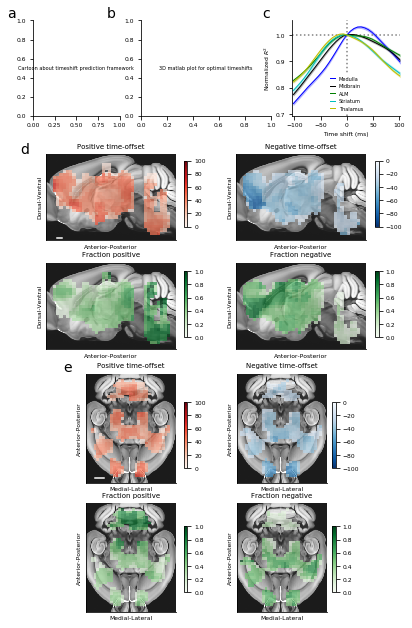

<Figure size 432x679.68 with 0 Axes>

In [88]:
plt.rcParams['figure.figsize'][1] = style.fig_w_max
plt.rcParams['figure.figsize'][1] = style.fig_w_max * 12 / 9

fig = plt.figure()
gs = gridspec.GridSpec(15, 12, figure=fig)  # 14 rows and 12 columns

# Top row, three subplots 6x6
ax1 = fig.add_subplot(gs[0:3, 0:4])  # First subplot, 3 rows x 3 columns
ax2 = fig.add_subplot(gs[0:3, 4:8])  # Second subplot, 3 rows x 3 columns
ax3 = fig.add_subplot(gs[0:3, 8:12])  # Third subplot, 3 rows x 2 columns


ax1.set_position([0.1, 0.77, 0.20, 0.14])  # [left, bottom, width, height]
ax2.set_position([0.35, 0.77, 0.3, 0.14])
ax3.set_position([0.70, 0.77, 0.25, 0.14])

f3 = plt_utils.Figure3()
f3.load_data()

f3.print_text(ax1,'Cartoon about timeshift prediction framework')
f3.print_text(ax2,'3D matlab plot for optimal timeshifts')
f3.plot_timeshift_curves(ax3, r2_method_string= '')

voxel_size = 300
filter_size = 3
proj_ax = 0
max_width = 0.30
max_height = 0.16

column1_start_top = 0.13
column1_start_bottom = 0.13
column2_start_top = 0.57
column2_start_bottom = 0.48

row1_start = 0.57
row2_start = 0.41
row3_start = 0.23
row4_start = 0.04

cbar_fraction = 0.02

alpha_anatomy = 0.9
alpha_heatmap = 0.7


ax6 = fig.add_subplot(gs[3:6, 0:6])
ax6.imshow(im_array[dv_slices[proj_ax], ml_slices[proj_ax], ap_slices[proj_ax]],extent = [xlims[proj_ax][0],xlims[proj_ax][1],ylims[proj_ax][0],ylims[proj_ax][1]], cmap = 'Greys_r', aspect='equal', alpha = alpha_anatomy)
im = plot_best_times_2d_heatmap_transpose(ax6, restricted_best_times[pos_inds], restricted_ccf_coords[pos_inds], 
                                          vlims = [0, 100], projection_axis = proj_ax, 
                                          voxel_size= voxel_size, filter_size = filter_size, 
                                          type = 'average', cmap = 'Reds', 
                                          xlims = xlims[proj_ax], ylims = ylims[proj_ax], 
                                          title = 'Positive time-offset',
                                          alpha = alpha_heatmap)
cbar = fig.colorbar(im, ax = ax6, fraction = cbar_fraction, pad = 0.01)
cbar.ax.set_position([cbar.ax.get_position().x0 - 0.05,  # Move left
                      cbar.ax.get_position().y0 - 0.0,  # Move down
                      cbar.ax.get_position().width, 
                      cbar.ax.get_position().height])
ax6.set_position([column1_start_top, row1_start, max_width, max_height])
ax6.plot([2500,3000],[7800,7800], '-', color = 'white')

ax8 = fig.add_subplot(gs[3:6, 6:12])
ax8.imshow(im_array[dv_slices[proj_ax], ml_slices[proj_ax], ap_slices[proj_ax]],extent = [xlims[proj_ax][0],xlims[proj_ax][1],ylims[proj_ax][0],ylims[proj_ax][1]], cmap = 'Greys_r', aspect='equal', alpha = alpha_anatomy)
im = plot_best_times_2d_heatmap_transpose(ax8, restricted_best_times[neg_inds], restricted_ccf_coords[neg_inds], 
                                          vlims = [-100, 0], projection_axis = proj_ax, 
                                          voxel_size= voxel_size, filter_size = filter_size, 
                                          type = 'average', cmap = 'Blues_r', 
                                          xlims = xlims[proj_ax], ylims = ylims[proj_ax], 
                                          title = 'Negative time-offset',
                                          alpha = alpha_heatmap)
cbar = fig.colorbar(im, ax = ax8, fraction = cbar_fraction, pad = 0.01)
cbar.ax.set_position([cbar.ax.get_position().x0 - 0.00,  # Move left
                      cbar.ax.get_position().y0 - 0.0,  # Move down
                      cbar.ax.get_position().width, 
                      cbar.ax.get_position().height])
ax8.set_position([column2_start_top, row1_start, max_width, max_height])

ax7 = fig.add_subplot(gs[6:9, 0:6]) 
ax7.imshow(im_array[dv_slices[proj_ax], ml_slices[proj_ax], ap_slices[proj_ax]],extent = [xlims[proj_ax][0],xlims[proj_ax][1],ylims[proj_ax][0],ylims[proj_ax][1]], cmap = 'Greys_r', aspect='equal', alpha = alpha_anatomy)
im = plot_best_times_2d_heatmap_transpose(ax7, restricted_best_times, restricted_ccf_coords, 
                                          vlims = [0, 1], projection_axis = proj_ax, 
                                          voxel_size= voxel_size, filter_size = filter_size, 
                                          type = 'fraction',subset_inds= pos_inds, cmap = 'Greens', 
                                          xlims = xlims[proj_ax], ylims = ylims[proj_ax], 
                                          title = 'Fraction positive',
                                          alpha = alpha_heatmap)
cbar = fig.colorbar(im, ax = ax7, fraction = cbar_fraction, pad = 0.01)
cbar.ax.set_position([cbar.ax.get_position().x0 - 0.05,  # Move left
                      cbar.ax.get_position().y0 - 0.01,  # Move down
                      cbar.ax.get_position().width, 
                      cbar.ax.get_position().height])
ax7.set_position([column1_start_top, row2_start, max_width, max_height])




ax9 = fig.add_subplot(gs[6:9, 6:12]) 
ax9.imshow(im_array[dv_slices[proj_ax], ml_slices[proj_ax], ap_slices[proj_ax]],extent = [xlims[proj_ax][0],xlims[proj_ax][1],ylims[proj_ax][0],ylims[proj_ax][1]], cmap = 'Greys_r', aspect='equal', alpha = alpha_anatomy)
im = plot_best_times_2d_heatmap_transpose(ax9, restricted_best_times, restricted_ccf_coords, 
                                          vlims = [0, 1], projection_axis = proj_ax, 
                                          voxel_size= voxel_size, filter_size = filter_size, 
                                          type = 'fraction',subset_inds= neg_inds, cmap = 'Greens', 
                                          xlims = xlims[proj_ax], ylims = ylims[proj_ax], 
                                          title = 'Fraction negative',
                                          alpha = alpha_heatmap)
cbar = fig.colorbar(im, ax = ax9, fraction = cbar_fraction, pad = 0.01)
cbar.ax.set_position([cbar.ax.get_position().x0 + 0.00,  # Move left
                      cbar.ax.get_position().y0 - 0.01,  # Move down
                      cbar.ax.get_position().width, 
                      cbar.ax.get_position().height])
ax9.set_position([column2_start_top, row2_start, max_width, max_height])


proj_ax = 1

ax10 = fig.add_subplot(gs[9:12, 0:6])
ax10.imshow(im_array[dv_slices[proj_ax], ml_slices[proj_ax], ap_slices[proj_ax]].T,extent = [xlims[proj_ax][0],xlims[proj_ax][1],ylims[proj_ax][1],ylims[proj_ax][0]], cmap = 'Greys_r', aspect='equal', alpha = alpha_anatomy)
im = plot_best_times_2d_heatmap(ax10, restricted_best_times[pos_inds], restricted_ccf_coords[pos_inds], 
                                vlims = [0, 100], projection_axis = proj_ax, 
                                type = 'average', cmap = 'Reds',
                                voxel_size= voxel_size, filter_size = filter_size, 
                                xlims = xlims[proj_ax], ylims = ylims[proj_ax], 
                                title = 'Positive time-offset',
                                alpha = alpha_heatmap)
cbar = fig.colorbar(im, ax = ax10, fraction = cbar_fraction, pad = 0.01)
cbar.ax.set_position([cbar.ax.get_position().x0 - 0.05,  # Move left
                      cbar.ax.get_position().y0 - 0.05,  # Move down
                      cbar.ax.get_position().width, 
                      cbar.ax.get_position().height])
ax10.set_position([column1_start_bottom, row3_start, max_width, max_height])
ax10.plot([1900,2900],[2000,2000], '-', color = 'white')

ax11 = fig.add_subplot(gs[9:12, 6:12])
ax11.imshow(im_array[dv_slices[proj_ax], ml_slices[proj_ax], ap_slices[proj_ax]].T,extent = [xlims[proj_ax][0],xlims[proj_ax][1],ylims[proj_ax][1],ylims[proj_ax][0]], cmap = 'Greys_r', aspect='equal', alpha = alpha_anatomy)
im = plot_best_times_2d_heatmap(ax11, restricted_best_times[neg_inds], restricted_ccf_coords[neg_inds], 
                                vlims = [-100, 0], projection_axis = proj_ax, 
                                type = 'average', cmap = 'Blues_r',
                                voxel_size= voxel_size, filter_size = filter_size, 
                                xlims = xlims[proj_ax], ylims = ylims[proj_ax], 
                                title = 'Negative time-offset',
                                alpha = alpha_heatmap)
cbar = fig.colorbar(im, ax = ax11, fraction = cbar_fraction, pad = 0.01)
cbar.ax.set_position([cbar.ax.get_position().x0 - 0.10,  # Move left
                      cbar.ax.get_position().y0 - 0.05,  # Move down
                      cbar.ax.get_position().width, 
                      cbar.ax.get_position().height])
ax11.set_position([column2_start_bottom, row3_start, max_width, max_height])

ax12 = fig.add_subplot(gs[12:15, 0:6])
ax12.imshow(im_array[dv_slices[proj_ax], ml_slices[proj_ax], ap_slices[proj_ax]].T,extent = [xlims[proj_ax][0],xlims[proj_ax][1],ylims[proj_ax][1],ylims[proj_ax][0]], cmap = 'Greys_r', aspect='equal', alpha = alpha_anatomy)
im = plot_best_times_2d_heatmap(ax12, restricted_best_times, restricted_ccf_coords, 
                                vlims = [0, 1], projection_axis = proj_ax, 
                                type = 'fraction', subset_inds= pos_inds, cmap = 'Greens',
                                voxel_size= voxel_size, filter_size = filter_size, 
                                xlims = xlims[proj_ax], ylims = ylims[proj_ax], 
                                title = 'Fraction positive',
                                alpha = alpha_heatmap)
cbar = fig.colorbar(im, ax = ax12, fraction = cbar_fraction, pad = 0.01)
cbar.ax.set_position([cbar.ax.get_position().x0 - 0.05,  # Move left
                      cbar.ax.get_position().y0 - 0.08,  # Move down
                      cbar.ax.get_position().width, 
                      cbar.ax.get_position().height])
ax12.set_position([column1_start_bottom, row4_start, max_width, max_height])


ax13 = fig.add_subplot(gs[12:15, 6:12])
ax13.imshow(im_array[dv_slices[proj_ax], ml_slices[proj_ax], ap_slices[proj_ax]].T,extent = [xlims[proj_ax][0],xlims[proj_ax][1],ylims[proj_ax][1],ylims[proj_ax][0]], cmap = 'Greys_r', aspect='equal', alpha = alpha_anatomy)
im = plot_best_times_2d_heatmap(ax13, restricted_best_times, restricted_ccf_coords, 
                                vlims = [0, 1], projection_axis = proj_ax, 
                                type = 'fraction', subset_inds= neg_inds, cmap = 'Greens',
                                voxel_size= voxel_size, filter_size = filter_size, 
                                xlims = xlims[proj_ax], ylims = ylims[proj_ax], 
                                title = 'Fraction negative',
                                alpha = alpha_heatmap)
cbar = fig.colorbar(im, ax = ax13, fraction = cbar_fraction, pad = 0.01)
cbar.ax.set_position([cbar.ax.get_position().x0 - 0.10,  # Move left
                      cbar.ax.get_position().y0 - 0.08,  # Move down
                      cbar.ax.get_position().width, 
                      cbar.ax.get_position().height])
ax13.set_position([column2_start_bottom, row4_start, max_width, max_height])

dv_axes = [ax6, ax7, ax8, ax9]
ap_axes_x = [ax6, ax7, ax8, ax9]
ap_axes_y = [ax10, ax11, ax12, ax13]
ml_axes = [ax10, ax11, ax12, ax13]
for ax in dv_axes:
    ax.set_ylabel('Dorsal-Ventral')
for ax in ap_axes_x:
    ax.set_xlabel('Anterior-Posterior')
for ax in ap_axes_y:
    ax.set_ylabel('Anterior-Posterior')
for ax in ml_axes:
    ax.set_xlabel('Medial-Lateral')

#ax4.set_position([0.1, 0.5, 0.25, 0.15])
fig.text(0.05, 0.92, 'a', ha='center', va='center', fontsize=14)
fig.text(0.28, 0.92, 'b', ha='center', va='center', fontsize=14)
fig.text(0.64, 0.92, 'c', ha='center', va='center', fontsize=14)
fig.text(0.08, 0.72, 'd', ha='center', va='center', fontsize=14)
fig.text(0.18, 0.40, 'e', ha='center', va='center', fontsize=14)
#fig.text(0.05, 0.28, 'f', ha='center', va='center', fontsize=14)

plt.savefig(figfolder + 'figure3_draft.png', dpi = 300)
plt.show()
plt.clf()


## Supplementary heatmaps

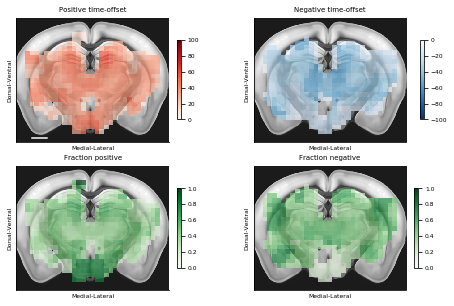

In [95]:
voxel_size = 300
filter_size = 3
proj_ax = 2

dv_slices = [slice(int(ylims[0][1] / res_image), int(ylims[0][0] / res_image)),
             210]
ml_slices = [250,
             slice(int(xlims[1][0] / res_image), int(xlims[1][1] / res_image))]
ap_slices = [slice(int(xlims[0][0] / res_image), int(xlims[0][1] / res_image)),
             slice(int(ylims[1][0] / res_image), int(ylims[1][1] / res_image))]

xlims = [[1500,13500], [900,10800]]
ylims = [[8000,0],[1500,13500]]

plt.subplots(2,2,figsize = (7.8,5))

ax1 = plt.subplot(2,2,1)

ax1.imshow(im_array[dv_slices[0], ml_slices[1], 350],
           extent = [xlims[1][0],xlims[1][1],ylims[0][0],ylims[0][1]], 
           cmap = 'Greys_r', aspect='equal', alpha = alpha_anatomy)

im = plot_best_times_2d_heatmap(ax1, restricted_best_times[pos_inds], restricted_ccf_coords[pos_inds], 
                                          vlims = [0, 100], projection_axis = proj_ax, 
                                          voxel_size= voxel_size, filter_size = filter_size, 
                                          type = 'average', cmap = 'Reds', 
                                          xlims = [900,10800], ylims = [8000,0], 
                                          title = 'Positive time-offset',
                                          alpha = alpha_heatmap)
cbar = fig.colorbar(im, ax = ax1, fraction = cbar_fraction, pad = 0.01)
cbar.ax.set_position([cbar.ax.get_position().x0 + 0.01,  # Move left
                      cbar.ax.get_position().y0 - 0.0,  # Move down
                      cbar.ax.get_position().width, 
                      cbar.ax.get_position().height])
ax1.plot([1900,2900],[7800,7800], '-', color = 'white')

ax2 = plt.subplot(2,2,2)

ax2.imshow(im_array[dv_slices[0], ml_slices[1], 350],
           extent = [xlims[1][0],xlims[1][1],ylims[0][0],ylims[0][1]], 
           cmap = 'Greys_r', aspect='equal', alpha = alpha_anatomy)

im = plot_best_times_2d_heatmap(ax2, restricted_best_times[neg_inds], restricted_ccf_coords[neg_inds], 
                                          vlims = [-100, 0], projection_axis = proj_ax, 
                                          voxel_size= voxel_size, filter_size = filter_size, 
                                          type = 'average', cmap = 'Blues_r', 
                                          xlims = [900,10800], ylims = [8000,0], 
                                          title = 'Negative time-offset',
                                          alpha = alpha_heatmap)
cbar = fig.colorbar(im, ax = ax2, fraction = cbar_fraction, pad = 0.01)
cbar.ax.set_position([cbar.ax.get_position().x0 + 0.02,  # Move left
                      cbar.ax.get_position().y0 - 0.0,  # Move down
                      cbar.ax.get_position().width, 
                      cbar.ax.get_position().height])

ax3 = plt.subplot(2,2,3)

ax3.imshow(im_array[dv_slices[0], ml_slices[1], 350],
           extent = [xlims[1][0],xlims[1][1],ylims[0][0],ylims[0][1]], 
           cmap = 'Greys_r', aspect='equal', alpha = alpha_anatomy)

im = plot_best_times_2d_heatmap(ax3, restricted_best_times, restricted_ccf_coords, 
                                          vlims = [0, 1], projection_axis = proj_ax, 
                                          voxel_size= voxel_size, filter_size = filter_size, 
                                          type = 'fraction', subset_inds= pos_inds, cmap = 'Greens', 
                                          xlims = [900,10800], ylims = [8000,0], 
                                          title = 'Fraction positive',
                                          alpha = alpha_heatmap)
cbar = fig.colorbar(im, ax = ax3, fraction = cbar_fraction, pad = 0.01)
cbar.ax.set_position([cbar.ax.get_position().x0 + 0.01,  # Move left
                      cbar.ax.get_position().y0 - 0.0,  # Move down
                      cbar.ax.get_position().width, 
                      cbar.ax.get_position().height])

ax4 = plt.subplot(2,2,4)

ax4.imshow(im_array[dv_slices[0], ml_slices[1], 350],
           extent = [xlims[1][0],xlims[1][1],ylims[0][0],ylims[0][1]], 
           cmap = 'Greys_r', aspect='equal', alpha = alpha_anatomy)

im = plot_best_times_2d_heatmap(ax4, restricted_best_times, restricted_ccf_coords, 
                                          vlims = [0, 1], projection_axis = proj_ax, 
                                          voxel_size= voxel_size, filter_size = filter_size, 
                                          type = 'fraction', subset_inds= neg_inds, cmap = 'Greens', 
                                          xlims = [900,10800], ylims = [8000,0], 
                                          title = 'Fraction negative',
                                          alpha = alpha_heatmap)
cbar = fig.colorbar(im, ax = ax4, fraction = cbar_fraction, pad = 0.01)
cbar.ax.set_position([cbar.ax.get_position().x0 + 0.01,  # Move left
                      cbar.ax.get_position().y0 - 0.0,  # Move down
                      cbar.ax.get_position().width, 
                      cbar.ax.get_position().height])

axes = [ax1, ax2, ax3, ax4]
for ax in axes:
    ax.set_xlabel('Medial-Lateral')
    ax.set_ylabel('Dorsal-Ventral')

plt.savefig('../figs/supplementary_figs/best_timeshift_heatmaps.png', dpi = 300)

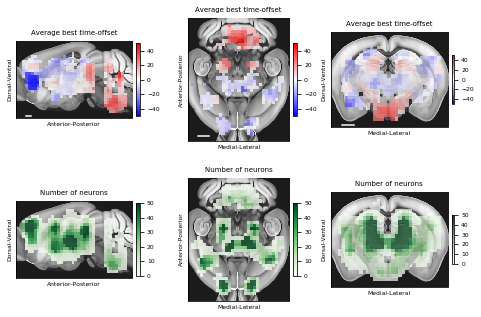

In [96]:
f,_ = plt.subplots(2,3,figsize = (7.8,5.2))

f.subplots_adjust(hspace = 0.3, wspace = 0.3)

proj_ax = 0
ax1 = plt.subplot(2,3,1)
ax1.imshow(im_array[dv_slices[proj_ax], ml_slices[proj_ax], ap_slices[proj_ax]],extent = [xlims[proj_ax][0],xlims[proj_ax][1],ylims[proj_ax][0],ylims[proj_ax][1]], cmap = 'Greys_r', aspect='equal', alpha = 0.9)
im = plot_best_times_2d_heatmap_transpose(ax1, restricted_best_times, restricted_ccf_coords, 
                                          vlims = [-50, 50], projection_axis = proj_ax, 
                                          voxel_size= voxel_size, filter_size = filter_size, 
                                          type = 'average', cmap = 'bwr', 
                                          xlims = xlims[proj_ax], ylims = ylims[proj_ax], 
                                          title = 'Average best time-offset')
cbar = fig.colorbar(im, ax = ax1, fraction = 0.03, pad = 0.01)
cbar.ax.set_position([cbar.ax.get_position().x0 + 0.005,  # Move left
                      cbar.ax.get_position().y0 - 0.0,  # Move down
                      cbar.ax.get_position().width, 
                      cbar.ax.get_position().height])
ax1.plot([2500,3000],[7800,7800], '-', color = 'white')

ax4 = plt.subplot(2,3,4)
ax4.imshow(im_array[dv_slices[proj_ax], ml_slices[proj_ax], ap_slices[proj_ax]],extent = [xlims[proj_ax][0],xlims[proj_ax][1],ylims[proj_ax][0],ylims[proj_ax][1]], cmap = 'Greys_r', aspect='equal', alpha = 0.9)
im = plot_best_times_2d_heatmap_transpose(ax4, restricted_best_times, restricted_ccf_coords, 
                                          vlims = [0, 50], projection_axis = proj_ax, 
                                          voxel_size= voxel_size, filter_size = filter_size, 
                                          type = 'count', cmap = 'Greens', 
                                          xlims = xlims[proj_ax], ylims = ylims[proj_ax], 
                                          title = 'Number of neurons')
cbar = fig.colorbar(im, ax = ax4, fraction = 0.03, pad = 0.01)
cbar.ax.set_position([cbar.ax.get_position().x0 + 0.005,  # Move left
                      cbar.ax.get_position().y0 - 0.0,  # Move down
                      cbar.ax.get_position().width, 
                      cbar.ax.get_position().height])

proj_ax = 1

ax2 = plt.subplot(2,3,2)
ax2.imshow(im_array[dv_slices[proj_ax], ml_slices[proj_ax], ap_slices[proj_ax]].T,extent = [xlims[proj_ax][0],xlims[proj_ax][1],ylims[proj_ax][1],ylims[proj_ax][0]], cmap = 'Greys_r', aspect='equal', alpha = 0.9)
im = plot_best_times_2d_heatmap(ax2, restricted_best_times, restricted_ccf_coords, 
                                vlims = [-50, 50], projection_axis = proj_ax, 
                                type = 'average', cmap = 'bwr',
                                voxel_size= voxel_size, filter_size = filter_size, 
                                xlims = xlims[proj_ax], ylims = ylims[proj_ax], 
                                title = 'Average best time-offset')
cbar = fig.colorbar(im, ax = ax2, fraction = 0.03, pad = 0.01)
cbar.ax.set_position([cbar.ax.get_position().x0 + 0.005,  # Move left
                      cbar.ax.get_position().y0 - 0.0,  # Move down
                      cbar.ax.get_position().width, 
                      cbar.ax.get_position().height])
ax2.plot([1900,2900],[2000,2000], '-', color = 'white')

ax5 = plt.subplot(2,3,5)
ax5.imshow(im_array[dv_slices[proj_ax], ml_slices[proj_ax], ap_slices[proj_ax]].T,extent = [xlims[proj_ax][0],xlims[proj_ax][1],ylims[proj_ax][1],ylims[proj_ax][0]], cmap = 'Greys_r', aspect='equal', alpha = 0.9)
im = plot_best_times_2d_heatmap(ax5, restricted_best_times, restricted_ccf_coords, 
                                vlims = [0, 50], projection_axis = proj_ax, 
                                type = 'count', cmap = 'Greens',
                                voxel_size= voxel_size, filter_size = filter_size, 
                                xlims = xlims[proj_ax], ylims = ylims[proj_ax], 
                                title = 'Number of neurons')
cbar = fig.colorbar(im, ax = ax5, fraction = 0.03, pad = 0.01)
cbar.ax.set_position([cbar.ax.get_position().x0 + 0.005,  # Move left
                      cbar.ax.get_position().y0 - 0.0,  # Move down
                      cbar.ax.get_position().width, 
                      cbar.ax.get_position().height])

proj_ax = 2

ax3 = plt.subplot(2,3,3)
ax3.imshow(im_array[dv_slices[0], ml_slices[1], 350],
           extent = [xlims[1][0],xlims[1][1],ylims[0][0],ylims[0][1]], 
           cmap = 'Greys_r', aspect='equal', alpha = alpha_anatomy)

im = plot_best_times_2d_heatmap(ax3, restricted_best_times, restricted_ccf_coords, 
                                vlims = [-50, 50], projection_axis = proj_ax, 
                                type = 'average', cmap = 'bwr',
                                voxel_size= voxel_size, filter_size = filter_size,
                                xlims = [900,10800], ylims = [8000,0], 
                                title = 'Average best time-offset',
                                alpha = alpha_heatmap)
cbar = fig.colorbar(im, ax = ax3, fraction = cbar_fraction, pad = 0.01)
cbar.ax.set_position([cbar.ax.get_position().x0 + 0.005,  # Move left
                      cbar.ax.get_position().y0 - 0.0,  # Move down
                      cbar.ax.get_position().width, 
                      cbar.ax.get_position().height])
ax3.plot([1900,2900],[7800,7800], '-', color = 'white')

ax6 = plt.subplot(2,3,6)
ax6.imshow(im_array[dv_slices[0], ml_slices[1], 350],
           extent = [xlims[1][0],xlims[1][1],ylims[0][0],ylims[0][1]], 
           cmap = 'Greys_r', aspect='equal', alpha = alpha_anatomy)

im = plot_best_times_2d_heatmap(ax6, restricted_best_times, restricted_ccf_coords, 
                                vlims = [0, 50], projection_axis = proj_ax, 
                                type = 'count', cmap = 'Greens',
                                voxel_size= voxel_size, filter_size = filter_size,
                                xlims = [900,10800], ylims = [8000,0], 
                                title = 'Number of neurons',
                                alpha = alpha_heatmap)
cbar = fig.colorbar(im, ax = ax6, fraction = cbar_fraction, pad = 0.01)
cbar.ax.set_position([cbar.ax.get_position().x0 + 0.005,  # Move left
                      cbar.ax.get_position().y0 - 0.0,  # Move down
                      cbar.ax.get_position().width, 
                      cbar.ax.get_position().height])

ax_group1 = [ax1,ax4]
ax_group2 = [ax2,ax5]
ax_group3 = [ax3,ax6]

for ax in ax_group1:
    ax.set_ylabel('Dorsal-Ventral')
    ax.set_xlabel('Anterior-Posterior')

for ax in ax_group2:
    ax.set_xlabel('Medial-Lateral')
    ax.set_ylabel('Anterior-Posterior')

for ax in ax_group3:
    ax.set_xlabel('Medial-Lateral')
    ax.set_ylabel('Dorsal-Ventral')

plt.savefig('../figs/supplementary_figs/best_timeshift_avg_nneurons_heatmaps.png', dpi = 300)

## Longer possible shifts

In [19]:

#r2_new = pickle.load(open('../data/final/r2_embed_cv_timeshift.pkl', 'rb'))
r2_new = pickle.load(open('../data/r2_embed_cv_timeshift_long.pkl', 'rb'))
timeshifts = np.arange(-60,62,2, dtype = int)
method_to_string = {'old': '_old', 'old_clipped': '_old', 'new': ''}

epoch = 'response'
r2_method = 'new'

r2 = []
fr = r2_new['5_0']['avg_fr'].copy()
ccf_coords = r2_new['5_0']['ccf_coords'].copy()

for timesh in timeshifts:
    r2.append(r2_new['5_%d'%timesh]['%s_r2%s'%(epoch,method_to_string[r2_method])].copy())

r2 = np.array(r2)
best_times = 3.4 * timeshifts[r2.argmax(axis = 0)]

delta_r2 = 1.20
fr_threshold = 2.
r2_threshold = 0.01

voxel_size = 300



delta_inds = np.where((r2.max(axis = 0) / r2.mean(axis = 0)) > delta_r2)[0]
fr_inds = np.where(fr > fr_threshold)[0]
threshold_inds = np.where(r2[np.where(timeshifts == 0)[0][0],:] > r2_threshold)[0]
threshold_inds = np.intersect1d(threshold_inds, fr_inds)
restriction_inds = np.intersect1d(threshold_inds, delta_inds)

restricted_best_times = best_times[restriction_inds]
restricted_ccf_coords = ccf_coords[restriction_inds]
pos_inds = np.where(restricted_best_times > 0)[0]
neg_inds = np.where(restricted_best_times < 0)[0]

In [20]:
f3 = plt_utils.Figure3()
f3.load_data(file_name = 'r2_embed_cv_timeshift_long.pkl')

In [21]:
f3.data.keys()

dict_keys(['5_0', '5_2', '5_4', '5_6', '5_8', '5_10', '5_12', '5_14', '5_16', '5_18', '5_20', '5_22', '5_24', '5_26', '5_28', '5_30', '5_32', '5_34', '5_36', '5_38', '5_40', '5_42', '5_44', '5_46', '5_48', '5_50', '5_52', '5_54', '5_56', '5_58', '5_60', '5_-60', '5_-58', '5_-56', '5_-54', '5_-52', '5_-50', '5_-48', '5_-46', '5_-44', '5_-42', '5_-40', '5_-38', '5_-36', '5_-34', '5_-32', '5_-30', '5_-28', '5_-26', '5_-24', '5_-22', '5_-20', '5_-18', '5_-16', '5_-14', '5_-12', '5_-10', '5_-8', '5_-6', '5_-4', '5_-2'])

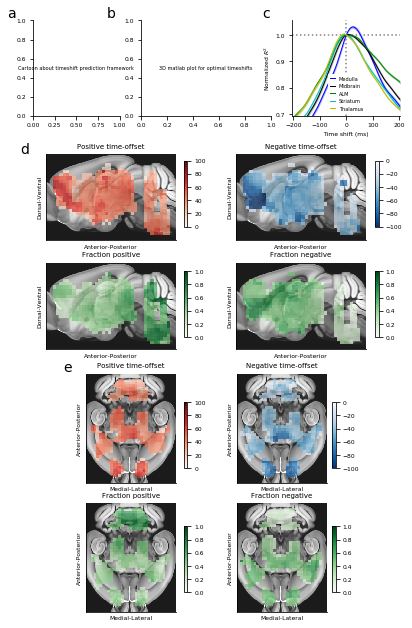

<Figure size 432x679.68 with 0 Axes>

In [22]:
plt.rcParams['figure.figsize'][1] = style.fig_w_max
plt.rcParams['figure.figsize'][1] = style.fig_w_max * 12 / 9

fig = plt.figure()
gs = gridspec.GridSpec(15, 12, figure=fig)  # 14 rows and 12 columns

# Top row, three subplots 6x6
ax1 = fig.add_subplot(gs[0:3, 0:4])  # First subplot, 3 rows x 3 columns
ax2 = fig.add_subplot(gs[0:3, 4:8])  # Second subplot, 3 rows x 3 columns
ax3 = fig.add_subplot(gs[0:3, 8:12])  # Third subplot, 3 rows x 2 columns


ax1.set_position([0.1, 0.77, 0.20, 0.14])  # [left, bottom, width, height]
ax2.set_position([0.35, 0.77, 0.3, 0.14])
ax3.set_position([0.70, 0.77, 0.25, 0.14])

f3.print_text(ax1,'Cartoon about timeshift prediction framework')
f3.print_text(ax2,'3D matlab plot for optimal timeshifts')
f3.plot_timeshift_curves(ax3, timeshifts = np.arange(-60,62,2), xlim = (-204,204))

voxel_size = 300
filter_size = 3
proj_ax = 0
max_width = 0.30
max_height = 0.16

column1_start_top = 0.13
column1_start_bottom = 0.13
column2_start_top = 0.57
column2_start_bottom = 0.48

row1_start = 0.57
row2_start = 0.41
row3_start = 0.23
row4_start = 0.04

cbar_fraction = 0.02

alpha_anatomy = 0.9
alpha_heatmap = 0.7


ax6 = fig.add_subplot(gs[3:6, 0:6])
ax6.imshow(im_array[dv_slices[proj_ax], ml_slices[proj_ax], ap_slices[proj_ax]],extent = [xlims[proj_ax][0],xlims[proj_ax][1],ylims[proj_ax][0],ylims[proj_ax][1]], cmap = 'Greys_r', aspect='equal', alpha = alpha_anatomy)
im = plot_best_times_2d_heatmap_transpose(ax6, restricted_best_times[pos_inds], restricted_ccf_coords[pos_inds], 
                                          vlims = [0, 100], projection_axis = proj_ax, 
                                          voxel_size= voxel_size, filter_size = filter_size, 
                                          type = 'average', cmap = 'Reds', 
                                          xlims = xlims[proj_ax], ylims = ylims[proj_ax], 
                                          title = 'Positive time-offset',
                                          alpha = alpha_heatmap)
cbar = fig.colorbar(im, ax = ax6, fraction = cbar_fraction, pad = 0.01)
cbar.ax.set_position([cbar.ax.get_position().x0 - 0.05,  # Move left
                      cbar.ax.get_position().y0 - 0.0,  # Move down
                      cbar.ax.get_position().width, 
                      cbar.ax.get_position().height])
ax6.set_position([column1_start_top, row1_start, max_width, max_height])

ax8 = fig.add_subplot(gs[3:6, 6:12])
ax8.imshow(im_array[dv_slices[proj_ax], ml_slices[proj_ax], ap_slices[proj_ax]],extent = [xlims[proj_ax][0],xlims[proj_ax][1],ylims[proj_ax][0],ylims[proj_ax][1]], cmap = 'Greys_r', aspect='equal', alpha = alpha_anatomy)
im = plot_best_times_2d_heatmap_transpose(ax8, restricted_best_times[neg_inds], restricted_ccf_coords[neg_inds], 
                                          vlims = [-100, 0], projection_axis = proj_ax, 
                                          voxel_size= voxel_size, filter_size = filter_size, 
                                          type = 'average', cmap = 'Blues_r', 
                                          xlims = xlims[proj_ax], ylims = ylims[proj_ax], 
                                          title = 'Negative time-offset',
                                          alpha = alpha_heatmap)
cbar = fig.colorbar(im, ax = ax8, fraction = cbar_fraction, pad = 0.01)
cbar.ax.set_position([cbar.ax.get_position().x0 - 0.00,  # Move left
                      cbar.ax.get_position().y0 - 0.0,  # Move down
                      cbar.ax.get_position().width, 
                      cbar.ax.get_position().height])
ax8.set_position([column2_start_top, row1_start, max_width, max_height])

ax7 = fig.add_subplot(gs[6:9, 0:6]) 
ax7.imshow(im_array[dv_slices[proj_ax], ml_slices[proj_ax], ap_slices[proj_ax]],extent = [xlims[proj_ax][0],xlims[proj_ax][1],ylims[proj_ax][0],ylims[proj_ax][1]], cmap = 'Greys_r', aspect='equal', alpha = alpha_anatomy)
im = plot_best_times_2d_heatmap_transpose(ax7, restricted_best_times, restricted_ccf_coords, 
                                          vlims = [0, 1], projection_axis = proj_ax, 
                                          voxel_size= voxel_size, filter_size = filter_size, 
                                          type = 'fraction',subset_inds= pos_inds, cmap = 'Greens', 
                                          xlims = xlims[proj_ax], ylims = ylims[proj_ax], 
                                          title = 'Fraction positive',
                                          alpha = alpha_heatmap)
cbar = fig.colorbar(im, ax = ax7, fraction = cbar_fraction, pad = 0.01)
cbar.ax.set_position([cbar.ax.get_position().x0 - 0.05,  # Move left
                      cbar.ax.get_position().y0 - 0.01,  # Move down
                      cbar.ax.get_position().width, 
                      cbar.ax.get_position().height])
ax7.set_position([column1_start_top, row2_start, max_width, max_height])




ax9 = fig.add_subplot(gs[6:9, 6:12]) 
ax9.imshow(im_array[dv_slices[proj_ax], ml_slices[proj_ax], ap_slices[proj_ax]],extent = [xlims[proj_ax][0],xlims[proj_ax][1],ylims[proj_ax][0],ylims[proj_ax][1]], cmap = 'Greys_r', aspect='equal', alpha = alpha_anatomy)
im = plot_best_times_2d_heatmap_transpose(ax9, restricted_best_times, restricted_ccf_coords, 
                                          vlims = [0, 1], projection_axis = proj_ax, 
                                          voxel_size= voxel_size, filter_size = filter_size, 
                                          type = 'fraction',subset_inds= neg_inds, cmap = 'Greens', 
                                          xlims = xlims[proj_ax], ylims = ylims[proj_ax], 
                                          title = 'Fraction negative',
                                          alpha = alpha_heatmap)
cbar = fig.colorbar(im, ax = ax9, fraction = cbar_fraction, pad = 0.01)
cbar.ax.set_position([cbar.ax.get_position().x0 + 0.00,  # Move left
                      cbar.ax.get_position().y0 - 0.01,  # Move down
                      cbar.ax.get_position().width, 
                      cbar.ax.get_position().height])
ax9.set_position([column2_start_top, row2_start, max_width, max_height])


proj_ax = 1

ax10 = fig.add_subplot(gs[9:12, 0:6])
ax10.imshow(im_array[dv_slices[proj_ax], ml_slices[proj_ax], ap_slices[proj_ax]].T,extent = [xlims[proj_ax][0],xlims[proj_ax][1],ylims[proj_ax][1],ylims[proj_ax][0]], cmap = 'Greys_r', aspect='equal', alpha = alpha_anatomy)
im = plot_best_times_2d_heatmap(ax10, restricted_best_times[pos_inds], restricted_ccf_coords[pos_inds], 
                                vlims = [0, 100], projection_axis = proj_ax, 
                                type = 'average', cmap = 'Reds',
                                voxel_size= voxel_size, filter_size = filter_size, 
                                xlims = xlims[proj_ax], ylims = ylims[proj_ax], 
                                title = 'Positive time-offset',
                                alpha = alpha_heatmap)
cbar = fig.colorbar(im, ax = ax10, fraction = cbar_fraction, pad = 0.01)
cbar.ax.set_position([cbar.ax.get_position().x0 - 0.05,  # Move left
                      cbar.ax.get_position().y0 - 0.05,  # Move down
                      cbar.ax.get_position().width, 
                      cbar.ax.get_position().height])
ax10.set_position([column1_start_bottom, row3_start, max_width, max_height])

ax11 = fig.add_subplot(gs[9:12, 6:12])
ax11.imshow(im_array[dv_slices[proj_ax], ml_slices[proj_ax], ap_slices[proj_ax]].T,extent = [xlims[proj_ax][0],xlims[proj_ax][1],ylims[proj_ax][1],ylims[proj_ax][0]], cmap = 'Greys_r', aspect='equal', alpha = alpha_anatomy)
im = plot_best_times_2d_heatmap(ax11, restricted_best_times[neg_inds], restricted_ccf_coords[neg_inds], 
                                vlims = [-100, 0], projection_axis = proj_ax, 
                                type = 'average', cmap = 'Blues_r',
                                voxel_size= voxel_size, filter_size = filter_size, 
                                xlims = xlims[proj_ax], ylims = ylims[proj_ax], 
                                title = 'Negative time-offset',
                                alpha = alpha_heatmap)
cbar = fig.colorbar(im, ax = ax11, fraction = cbar_fraction, pad = 0.01)
cbar.ax.set_position([cbar.ax.get_position().x0 - 0.10,  # Move left
                      cbar.ax.get_position().y0 - 0.05,  # Move down
                      cbar.ax.get_position().width, 
                      cbar.ax.get_position().height])
ax11.set_position([column2_start_bottom, row3_start, max_width, max_height])

ax12 = fig.add_subplot(gs[12:15, 0:6])
ax12.imshow(im_array[dv_slices[proj_ax], ml_slices[proj_ax], ap_slices[proj_ax]].T,extent = [xlims[proj_ax][0],xlims[proj_ax][1],ylims[proj_ax][1],ylims[proj_ax][0]], cmap = 'Greys_r', aspect='equal', alpha = alpha_anatomy)
im = plot_best_times_2d_heatmap(ax12, restricted_best_times, restricted_ccf_coords, 
                                vlims = [0, 1], projection_axis = proj_ax, 
                                type = 'fraction', subset_inds= pos_inds, cmap = 'Greens',
                                voxel_size= voxel_size, filter_size = filter_size, 
                                xlims = xlims[proj_ax], ylims = ylims[proj_ax], 
                                title = 'Fraction positive',
                                alpha = alpha_heatmap)
cbar = fig.colorbar(im, ax = ax12, fraction = cbar_fraction, pad = 0.01)
cbar.ax.set_position([cbar.ax.get_position().x0 - 0.05,  # Move left
                      cbar.ax.get_position().y0 - 0.08,  # Move down
                      cbar.ax.get_position().width, 
                      cbar.ax.get_position().height])
ax12.set_position([column1_start_bottom, row4_start, max_width, max_height])


ax13 = fig.add_subplot(gs[12:15, 6:12])
ax13.imshow(im_array[dv_slices[proj_ax], ml_slices[proj_ax], ap_slices[proj_ax]].T,extent = [xlims[proj_ax][0],xlims[proj_ax][1],ylims[proj_ax][1],ylims[proj_ax][0]], cmap = 'Greys_r', aspect='equal', alpha = alpha_anatomy)
im = plot_best_times_2d_heatmap(ax13, restricted_best_times, restricted_ccf_coords, 
                                vlims = [0, 1], projection_axis = proj_ax, 
                                type = 'fraction', subset_inds= neg_inds, cmap = 'Greens',
                                voxel_size= voxel_size, filter_size = filter_size, 
                                xlims = xlims[proj_ax], ylims = ylims[proj_ax], 
                                title = 'Fraction negative',
                                alpha = alpha_heatmap)
cbar = fig.colorbar(im, ax = ax13, fraction = cbar_fraction, pad = 0.01)
cbar.ax.set_position([cbar.ax.get_position().x0 - 0.10,  # Move left
                      cbar.ax.get_position().y0 - 0.08,  # Move down
                      cbar.ax.get_position().width, 
                      cbar.ax.get_position().height])
ax13.set_position([column2_start_bottom, row4_start, max_width, max_height])

dv_axes = [ax6, ax7, ax8, ax9]
ap_axes_x = [ax6, ax7, ax8, ax9]
ap_axes_y = [ax10, ax11, ax12, ax13]
ml_axes = [ax10, ax11, ax12, ax13]
for ax in dv_axes:
    ax.set_ylabel('Dorsal-Ventral')
for ax in ap_axes_x:
    ax.set_xlabel('Anterior-Posterior')
for ax in ap_axes_y:
    ax.set_ylabel('Anterior-Posterior')
for ax in ml_axes:
    ax.set_xlabel('Medial-Lateral')

#ax4.set_position([0.1, 0.5, 0.25, 0.15])
fig.text(0.05, 0.92, 'a', ha='center', va='center', fontsize=14)
fig.text(0.28, 0.92, 'b', ha='center', va='center', fontsize=14)
fig.text(0.64, 0.92, 'c', ha='center', va='center', fontsize=14)
fig.text(0.08, 0.72, 'd', ha='center', va='center', fontsize=14)
fig.text(0.18, 0.40, 'e', ha='center', va='center', fontsize=14)
#fig.text(0.05, 0.28, 'f', ha='center', va='center', fontsize=14)

plt.savefig(figfolder + 'figure3_draft_v2.png', dpi = 300)
plt.show()
plt.clf()


## ALM best timeshift

In [17]:
r2_new = pickle.load(open('../data/final/r2_embed_cv_timeshift.pkl', 'rb'))
timeshifts = np.arange(-30,32,2, dtype = int)
method_to_string = {'old': '_old', 'old_clipped': '_old', 'new': ''}

epoch = 'response'
r2_method = 'new'

r2 = []
fr = r2_new['5_0']['avg_fr'].copy()
ccf_coords = r2_new['5_0']['ccf_coords'].copy()

for timesh in timeshifts:
    r2.append(r2_new['5_%d'%timesh]['%s_r2%s'%(epoch,method_to_string[r2_method])].copy())

r2 = np.array(r2)
best_times = 3.4 * timeshifts[r2.argmax(axis = 0)]

delta_r2 = 1.20
fr_threshold = 2.
r2_threshold = 0.01

voxel_size = 300


alm_inds = np.where(r2_new['5_0']['is_alm'] == 1)[0]
delta_inds = np.where((r2.max(axis = 0) / r2.mean(axis = 0)) > delta_r2)[0]
fr_inds = np.where(fr > fr_threshold)[0]
threshold_inds = np.where(r2[np.where(timeshifts == 0)[0][0],:] > r2_threshold)[0]
threshold_inds = np.intersect1d(threshold_inds, fr_inds)
restriction_inds = np.intersect1d(threshold_inds, delta_inds)
alm_restriction_inds = np.intersect1d(restriction_inds, alm_inds)

restricted_best_times = best_times[restriction_inds]
restricted_ccf_coords = ccf_coords[restriction_inds]
pos_inds = np.where(restricted_best_times > 0)[0]
neg_inds = np.where(restricted_best_times < 0)[0]


alm_best_times = best_times[alm_restriction_inds]
alm_ccf_coords = ccf_coords[alm_restriction_inds]
alm_r2 = r2[:,alm_restriction_inds]
# alm_best_times = best_times[alm_inds]
# alm_ccf_coords = ccf_coords[alm_inds]
# alm_r2 = r2[:,alm_inds]

(500, 2400)

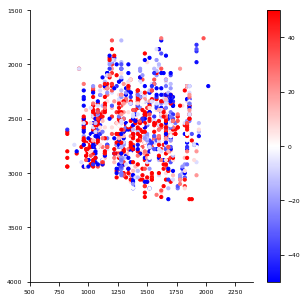

In [97]:
plt.figure(figsize = (5,5))
sc = plt.scatter(np.abs(alm_ccf_coords[:,0]-5700), alm_ccf_coords[:,1], c = alm_best_times, cmap = 'bwr',vmin = -50,vmax = 50, s = 10)
plt.colorbar()
plt.ylim(4000,1500)
plt.xlim(500,2400)

(500, 2400)

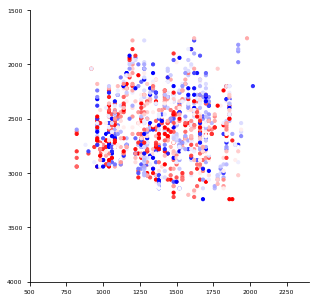

In [98]:
plt.figure(figsize = (5,5))
plt.scatter(np.abs(alm_ccf_coords[:,0]-5700), alm_ccf_coords[:,1], c = alm_best_times, cmap = 'bwr', s = 10)
plt.ylim(4000,1500)
plt.xlim(500,2400)

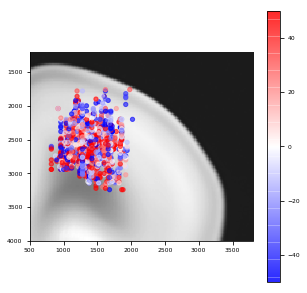

In [99]:
plt.figure(figsize = (5,5))
sc = plt.scatter(np.abs(alm_ccf_coords[:,0]-5700), alm_ccf_coords[:,1], c = alm_best_times, cmap = 'bwr',vmin = -50,vmax = 50, s = 18, alpha = 0.6)
plt.colorbar()
dv_min = 1200
dv_max = 4000
ml_min = 500
ml_max = 3800
plt.ylim(dv_max,dv_min)
plt.xlim(ml_min,ml_max)
dv_slice = slice(dv_min//res_image, dv_max//res_image)
ml_slice = slice( (5700 + ml_min)//res_image, (5700+ ml_max)//res_image)
ap_slice = 160


plt.imshow(im_array[dv_slice, ml_slice, ap_slice],extent = [ml_min, ml_max, dv_max, dv_min], cmap = 'Greys_r', aspect='equal', alpha = 0.9)


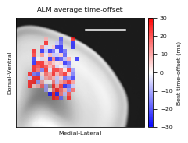

In [47]:
symmetric_ccf_coords = alm_ccf_coords.copy()
symmetric_ccf_coords[:,0] = np.abs(symmetric_ccf_coords[:,0] - 5700)

voxel_size = 100
filter_size = 1
proj_ax = 2
alpha_anatomy = 0.9
alpha_heatmap = 0.7
cbar_fraction = 0.04

res_image = 20
xlims = [[1500,13500], [900,10800]]
ylims = [[8000,0],[1500,13500]]

dv_slices = [slice(int(ylims[0][1] / res_image), int(ylims[0][0] / res_image)),
             210]
ml_slices = [250,
             slice(int(xlims[1][0] / res_image), int(xlims[1][1] / res_image))]
ap_slices = [slice(int(xlims[0][0] / res_image), int(xlims[0][1] / res_image)),
             slice(int(ylims[1][0] / res_image), int(ylims[1][1] / res_image))]



fig,_ = plt.subplots(1,1,figsize = (2.5,2))

ax1 = plt.subplot(1,1,1)

dv_slice = slice(dv_min//res_image, dv_max//res_image)
ml_slice = slice( (5700 + ml_min)//res_image, (5700+ ml_max)//res_image)
ap_slice = 160
ax1.imshow(im_array[dv_slice, ml_slice, ap_slice],extent = [ml_min, ml_max, dv_max, dv_min], cmap = 'Greys_r', aspect='equal', alpha = 0.9)


im = plot_best_times_2d_heatmap(ax1, alm_best_times, symmetric_ccf_coords, 
                                          vlims = [-30, 30], projection_axis = proj_ax, 
                                          voxel_size= voxel_size, filter_size = filter_size, 
                                          type = 'average', cmap = 'bwr', 
                                          xlims = [900,10800], ylims = [8000,0], 
                                          title = 'ALM average time-offset',
                                          alpha = alpha_heatmap)
cbar = fig.colorbar(im, ax = ax1, fraction = cbar_fraction, pad = 0.01, label = 'Best time-offset (ms)')
cbar.ax.set_position([cbar.ax.get_position().x0 + 0.01,  # Move left
                      cbar.ax.get_position().y0 - 0.0,  # Move down
                      cbar.ax.get_position().width, 
                      cbar.ax.get_position().height])
ax1.plot([2300,3300],[1500,1500], '-', color = 'white')

dv_min = 1200
dv_max = 4000
ml_min = 500
ml_max = 3800

plt.ylim(dv_max,dv_min)
plt.xlim(ml_min,ml_max)
plt.xlabel('Medial-Lateral')
plt.ylabel('Dorsal-Ventral')
plt.savefig('../figs/supplementary_figs/alm_best_timeshift_heatmap_no_smooth.png', dpi = 300, bbox_inches = 'tight')


In [100]:
alm_dv_coords = alm_ccf_coords[:,1]
min_alm_dv = alm_dv_coords.min()
max_alm_dv = alm_dv_coords.max()
print(min_alm_dv, max_alm_dv)

alm_dv_coord_bins = np.linspace(min_alm_dv, max_alm_dv, 11)

r2_traces_by_dv = []

for ii in range(10):
    inds = np.where((alm_dv_coords >= alm_dv_coord_bins[ii]) & (alm_dv_coords < alm_dv_coord_bins[ii+1]))[0]
    r2_traces_by_dv.append(alm_r2[:,inds])

1760 3240


In [101]:
min_mm = 0
max_mm = (max_alm_dv - min_alm_dv) / 1000

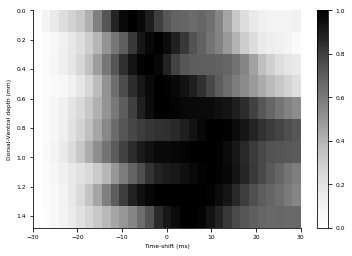

In [102]:
mean_dv_r2_traces = np.array([np.mean(r2_traces / r2_traces[np.where(timeshifts == 0)[0][0]], axis = 1) for r2_traces in r2_traces_by_dv])
mean_dv_r2_normed = mean_dv_r2_traces - np.min(mean_dv_r2_traces, axis = 1, keepdims = True)
mean_dv_r2_normed = mean_dv_r2_normed / np.max(mean_dv_r2_normed, axis = 1, keepdims = True)
plt.imshow( mean_dv_r2_normed, aspect = 'auto', cmap = 'Greys', extent=[timeshifts[0],timeshifts[-1],max_mm,min_mm])
plt.xlabel('Time-shift (ms)')
plt.ylabel('Dorsal-Ventral depth (mm)')
plt.colorbar()

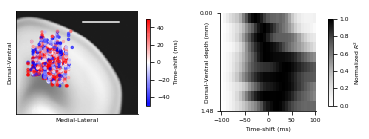

In [126]:
plt.subplots(1,2,figsize = (6,2))

plt.subplot(1,2,1)
sc = plt.scatter(np.abs(alm_ccf_coords[:,0]-5700), alm_ccf_coords[:,1], c = alm_best_times, cmap = 'bwr',vmin = -50,vmax = 50, s = 6, alpha = 0.6)
plt.colorbar(shrink = 0.8, label = 'Time-shift (ms)')
dv_min = 1200
dv_max = 4000
ml_min = 500
ml_max = 3800
plt.ylim(dv_max,dv_min)
plt.xlim(ml_min,ml_max)
dv_slice = slice(dv_min//res_image, dv_max//res_image)
ml_slice = slice( (5700 + ml_min)//res_image, (5700+ ml_max)//res_image)
ap_slice = 160
plt.xlabel('Medial-Lateral')
plt.ylabel('Dorsal-Ventral')
plt.xticks([])
plt.yticks([])
plt.plot([2300,3300],[1500,1500], '-', color = 'white')


plt.imshow(im_array[dv_slice, ml_slice, ap_slice],extent = [ml_min, ml_max, dv_max, dv_min], cmap = 'Greys_r', aspect='equal', alpha = 0.9)

ax = plt.subplot(1,2,2)
plt.imshow( mean_dv_r2_normed, aspect = 'auto', cmap = 'Greys', extent=[3.4*timeshifts[0],3.4*timeshifts[-1],max_mm,min_mm])
plt.xlabel('Time-shift (ms)')
plt.ylabel('Dorsal-Ventral depth (mm)', labelpad = -10)
plt.yticks([min_mm,max_mm])
plt.colorbar(shrink = 0.8, pad = -0.2, label = r'Normalized $R^2$')
pos = ax.get_position()
ax.set_position([pos.x0 + 0.05, pos.y0 + 0.04, 0.6* pos.width, pos.height*0.9])

plt.savefig('../figs/supplementary_figs/alm_r2_timeshift.png', dpi = 300, bbox_inches = 'tight')

1760 3240


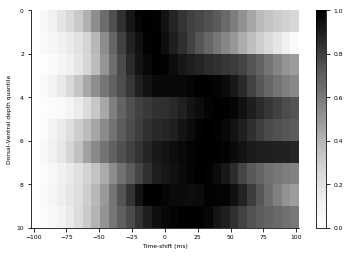

In [104]:
alm_dv_coords = alm_ccf_coords[:,1]
min_alm_dv = alm_dv_coords.min()
max_alm_dv = alm_dv_coords.max()
print(min_alm_dv, max_alm_dv)

alm_dv_coord_bins = np.linspace(min_alm_dv, max_alm_dv, 11)
k = 10
quantiles = np.quantile(alm_dv_coords, np.linspace(0,1,k+1))

quantile_inds = np.digitize(alm_dv_coords, quantiles, right = True) - 1

r2_quantile_traces = []

for ii in range(k):
    inds = np.where(quantile_inds == ii)[0]
    r2_quantile_traces.append(alm_r2[:,inds])

mean_quant_r2_traces = np.array([np.mean(r2_traces / r2_traces[np.where(timeshifts == 0)[0][0]], axis = 1) for r2_traces in r2_quantile_traces])
mean_quant_r2_normed = mean_quant_r2_traces - np.min(mean_quant_r2_traces, axis = 1, keepdims = True)
mean_quant_r2_normed = mean_quant_r2_normed / np.max(mean_quant_r2_normed, axis = 1, keepdims = True)
plt.imshow( mean_quant_r2_normed, aspect = 'auto', cmap = 'Greys', extent=[3.4*timeshifts[0],3.4*timeshifts[-1],k,0])
plt.xlabel('Time-shift (ms)')
plt.ylabel('Dorsal-Ventral depth quantile')
plt.colorbar()

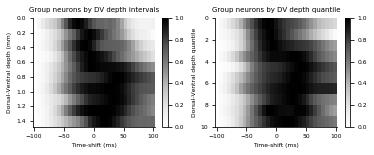

In [105]:
plt.subplots(1,2,figsize = (6,2))

plt.subplot(1,2,1)
plt.title('Group neurons by DV depth intervals')
plt.imshow( mean_dv_r2_normed, aspect = 'auto', cmap = 'Greys', extent=[3.4*timeshifts[0],3.4*timeshifts[-1],max_mm,min_mm])
plt.xlabel('Time-shift (ms)')
plt.ylabel('Dorsal-Ventral depth (mm)')
plt.colorbar()

plt.subplot(1,2,2)
plt.title('Group neurons by DV depth quantile')
plt.imshow( mean_quant_r2_normed, aspect = 'auto', cmap = 'Greys', extent=[3.4*timeshifts[0],3.4*timeshifts[-1],k,0])
plt.xlabel('Time-shift (ms)')
plt.ylabel('Dorsal-Ventral depth quantile')
plt.colorbar()

plt.savefig('../figs/supplementary_figs/alm_r2_timeshift_grouped_interval_vs_quantile.png', dpi = 300, bbox_inches = 'tight')

In [106]:
import scipy
spearman, pval = scipy.stats.spearmanr(alm_dv_coords, alm_best_times)
print(spearman, pval)

0.09813365820981772 0.0013865236763194579


In [108]:
pearson, pval = scipy.stats.pearsonr(alm_dv_coords, alm_best_times)
print(pearson, pval)

0.09875028761292222 0.0012925369807374309


In [110]:
median_dv = np.median(alm_dv_coords)
low_dv_inds = np.where(alm_dv_coords < median_dv)[0]
high_dv_inds = np.where(alm_dv_coords >= median_dv)[0]

low_timeshifts = alm_best_times[low_dv_inds]
high_timeshifts = alm_best_times[high_dv_inds]
print(np.mean(low_timeshifts), np.mean(high_timeshifts))
print(np.std(low_timeshifts)/np.sqrt(len(low_timeshifts)), np.std(high_timeshifts)/np.sqrt(len(high_timeshifts)))
mann_stat, mann_p = scipy.stats.mannwhitneyu(low_timeshifts, high_timeshifts)
t_stat, t_p = scipy.stats.ttest_ind(low_timeshifts, high_timeshifts)
print(mann_stat, mann_p)
print(t_stat, t_p)

2.693069306930694 11.145126353790614
2.3635727060202223 2.420753063203746
127154.5 0.010369775880990013
-2.4877496470967184 0.01300864900560718
